# An introduction to R for psychologists

### Part 2 : Illustration

In [1]:
library(repr)

options(repr.plot.width=8, repr.plot.height=6, repr.plot.res = 200)#hidden code for display size

## Summary of this section

- Illustrate statistical concepts using R
    - Expected value and sampling
    - P-values 
    - Confidence Intervals
- Create a psychological experiment from scratch :
    - data simulation
    - export, import, data wrangling
- Useful ressources 

# Sampling from a random variable

_e.g._ IQ $ \sim N(100,15)$



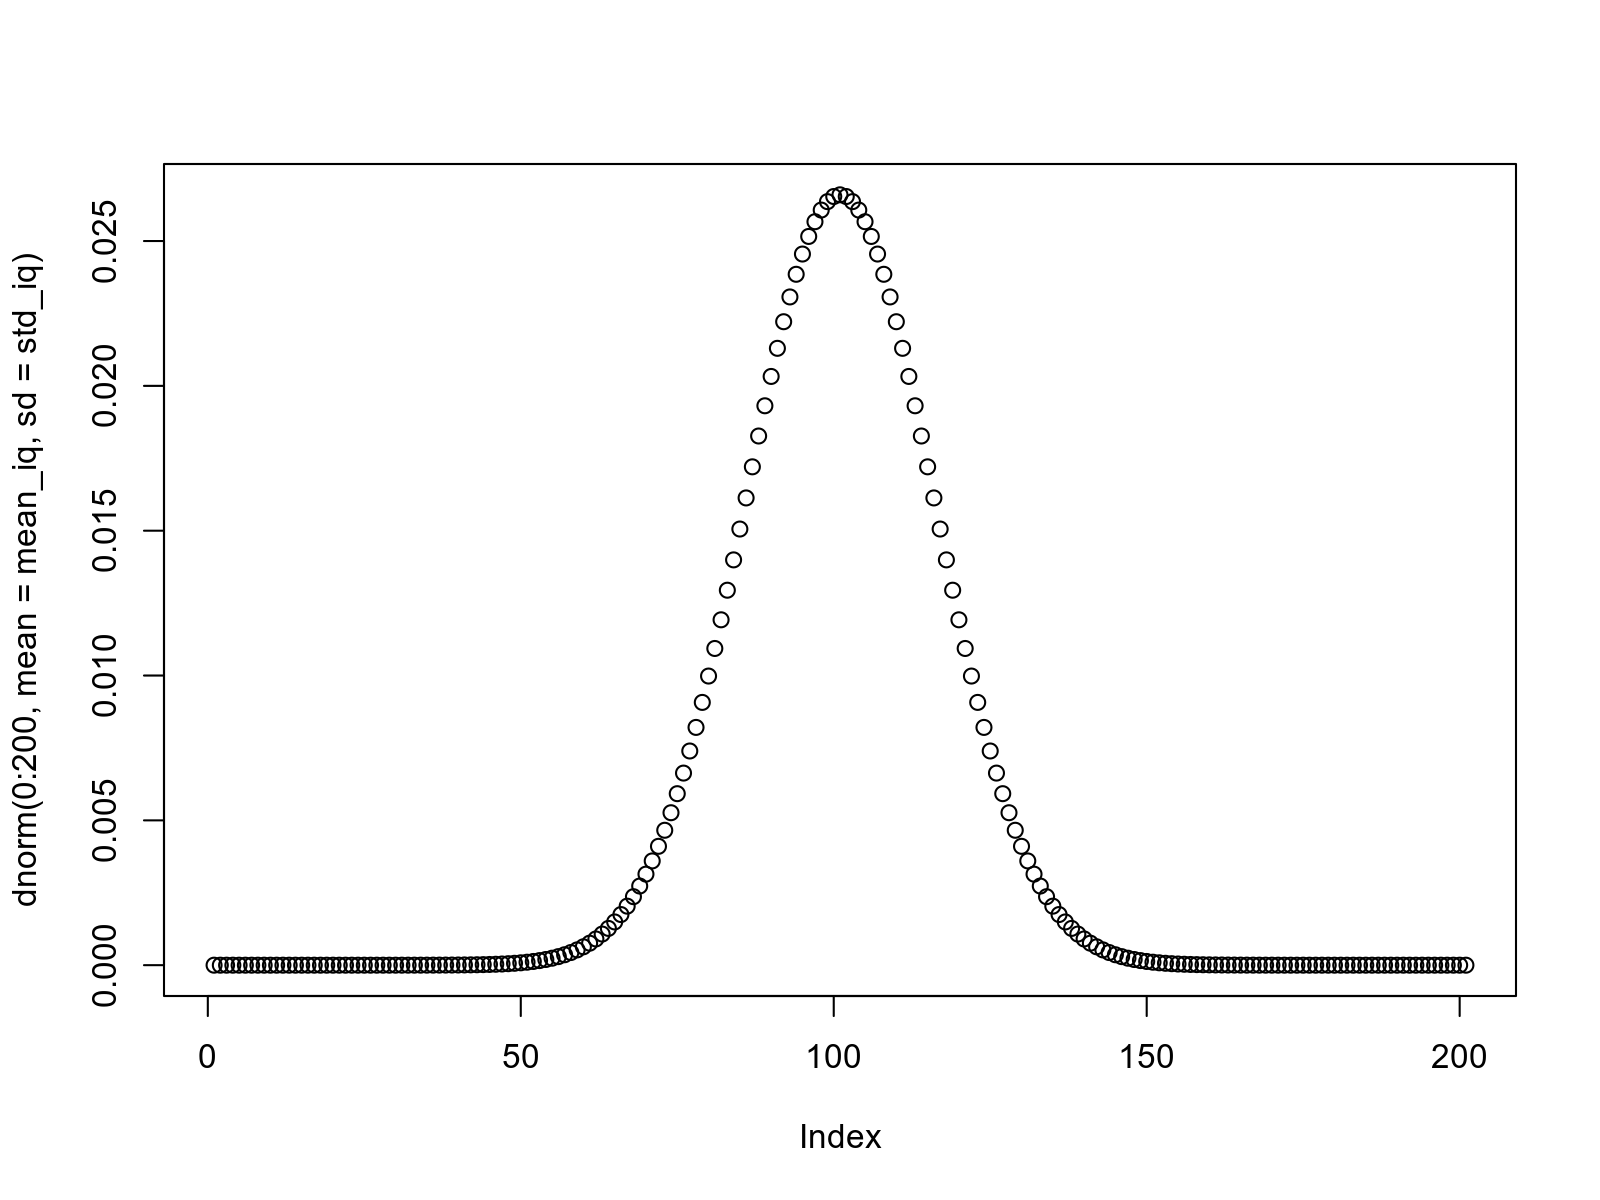

In [2]:
mean_iq <- 100
std_iq <- 15
plot(dnorm(0:200, mean = mean_iq, sd = std_iq))

Sampling from this normal distribution :

In [3]:
?rnorm
rnorm(10, mean_iq, std_iq)#Taking 10 random samples from the distribution

[1]  98.25784 126.58881 103.69909 103.49046 100.48306 127.50516 107.69874
 [8]  79.11394  96.95704  77.42394

[1] 99.63786
[1] 15.70535


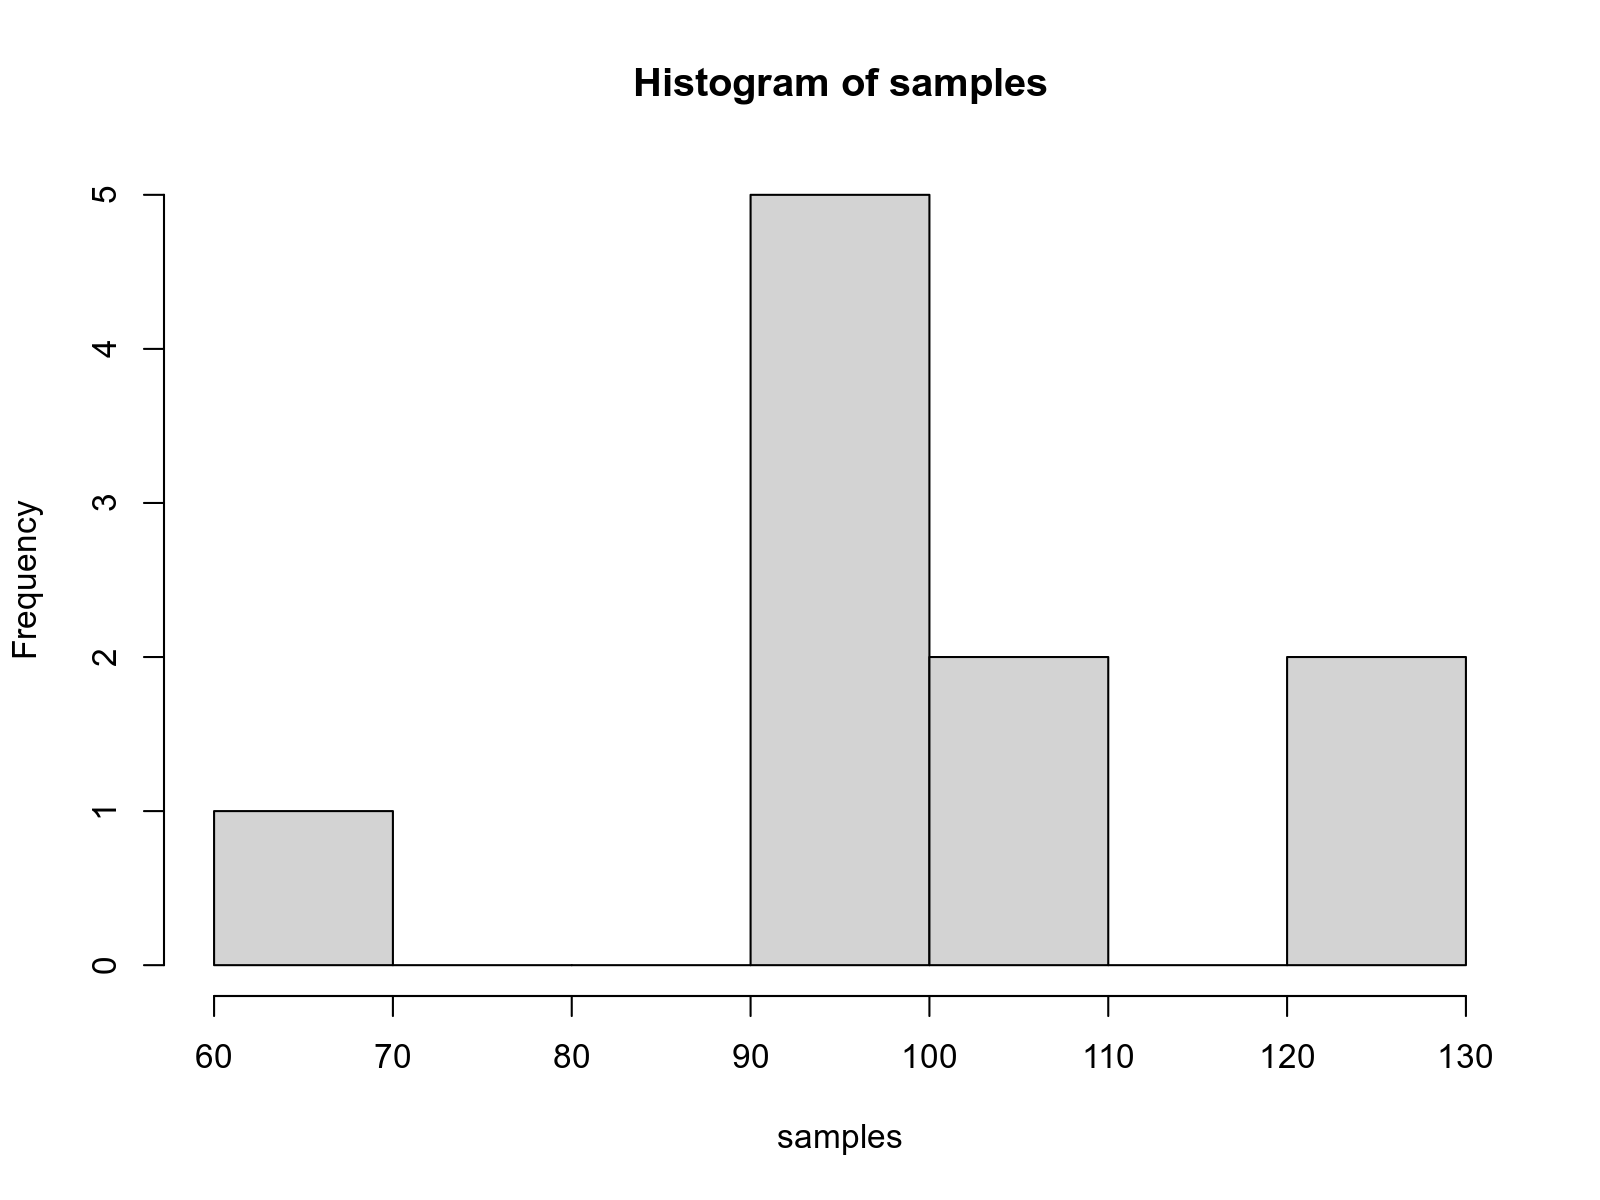

In [4]:
samples = rnorm(10, mean_iq, std_iq)
hist(samples)
print(mean(samples))#Computing the mean from the sample and printing it
print(sd(samples))#same for standard deviation

$E(\text{IQ}) = 100$

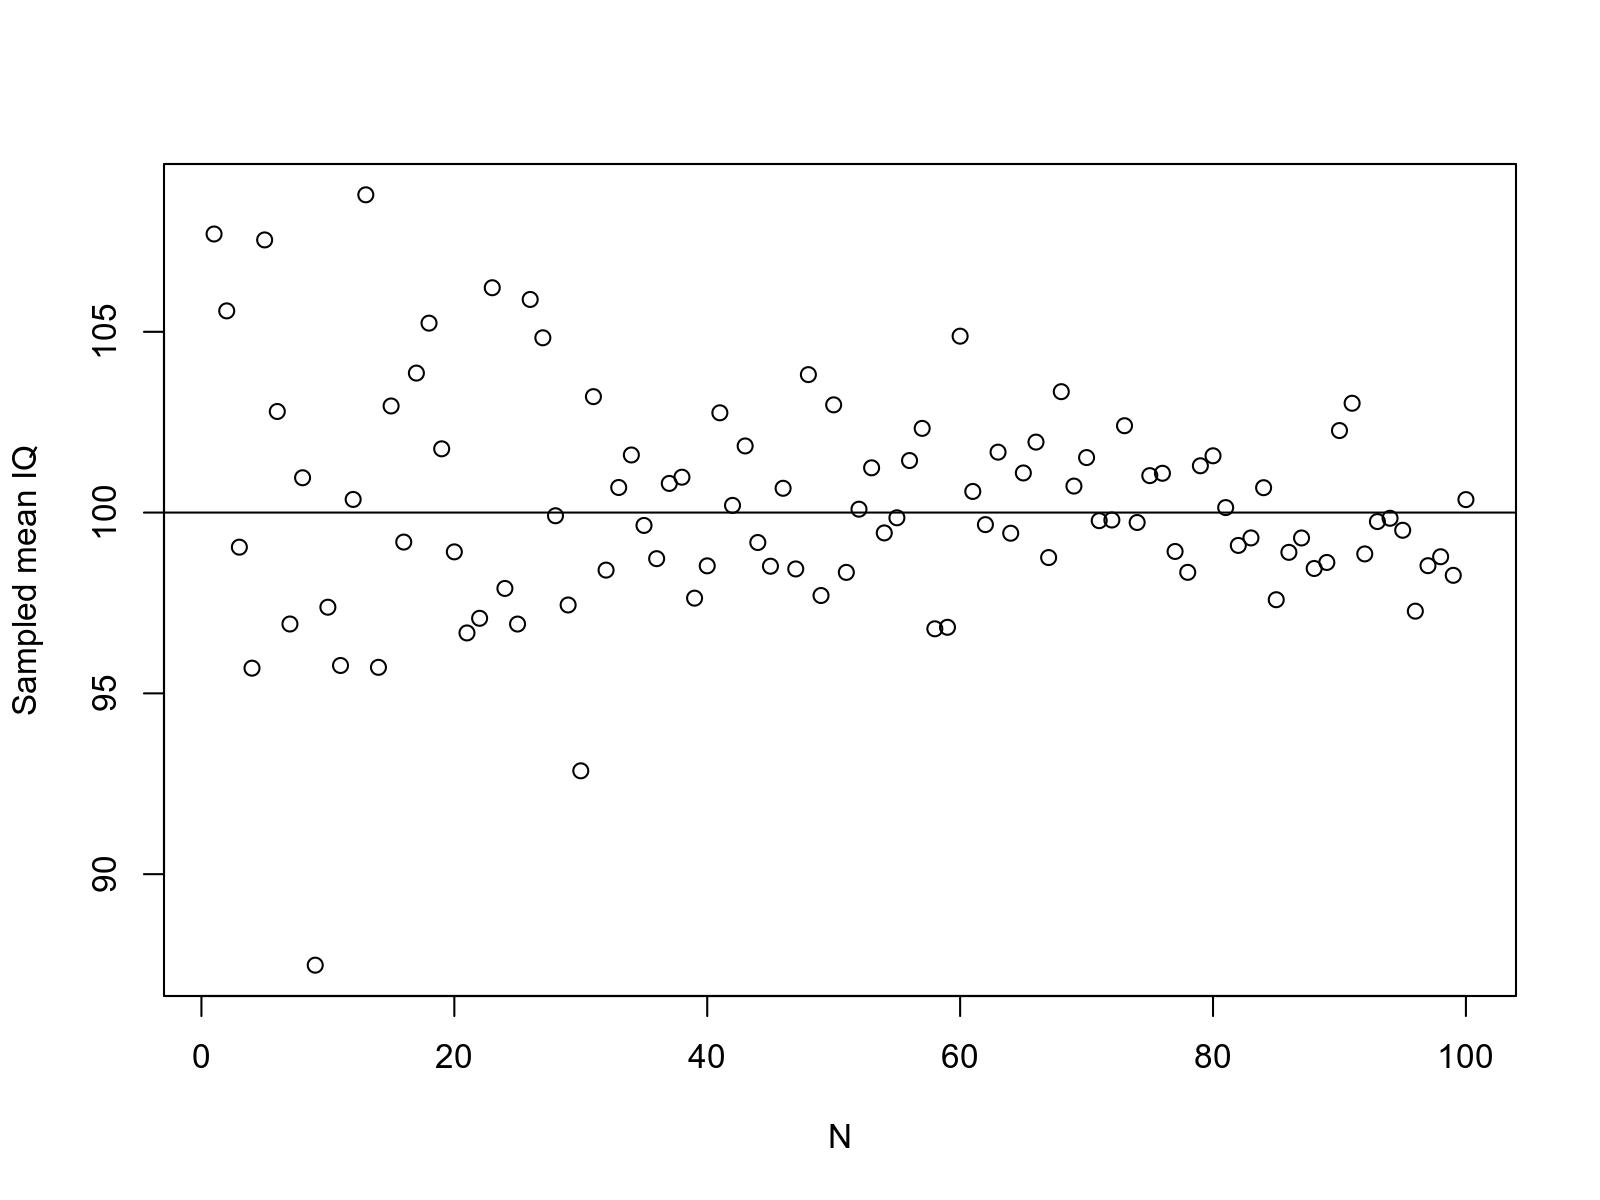

In [5]:
#Creating a for loop to illustrate the notion of sampling : 
upper_bound = 100 #Up to 100 person sampled
vector_mean_iq = NULL
for (i in 1:upper_bound){
    #Now we take the mean of i simulated values from a normal distribution with mean_iq and std_iq as
    #mean and std parameter
    vector_mean_iq[i] <- mean(rnorm(i, mean_iq, std_iq))
}
plot(1:upper_bound, vector_mean_iq, xlab='N', ylab='Sampled mean IQ')
abline(h=100)

# P-values

Definition ?

p_value = $p(D|H_0)$ = how are we surprised seeing the data assuming $H_0$ is true

__NOT__ $p(H_0|D)$

As we are bad statisticians lets simulate to illustrate the correct definition

Illustration using t-tests

In [6]:
?t.test


In [7]:
t.test(rnorm(10, mean_iq, std_iq), rnorm(10, mean_iq, std_iq))#Note the use of Welch t.test


	Welch Two Sample t-test

data:  rnorm(10, mean_iq, std_iq) and rnorm(10, mean_iq, std_iq)
t = 1.1137, df = 17.18, p-value = 0.2808
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.856819 15.735001
sample estimates:
mean of x mean of y 
101.44276  96.00367 


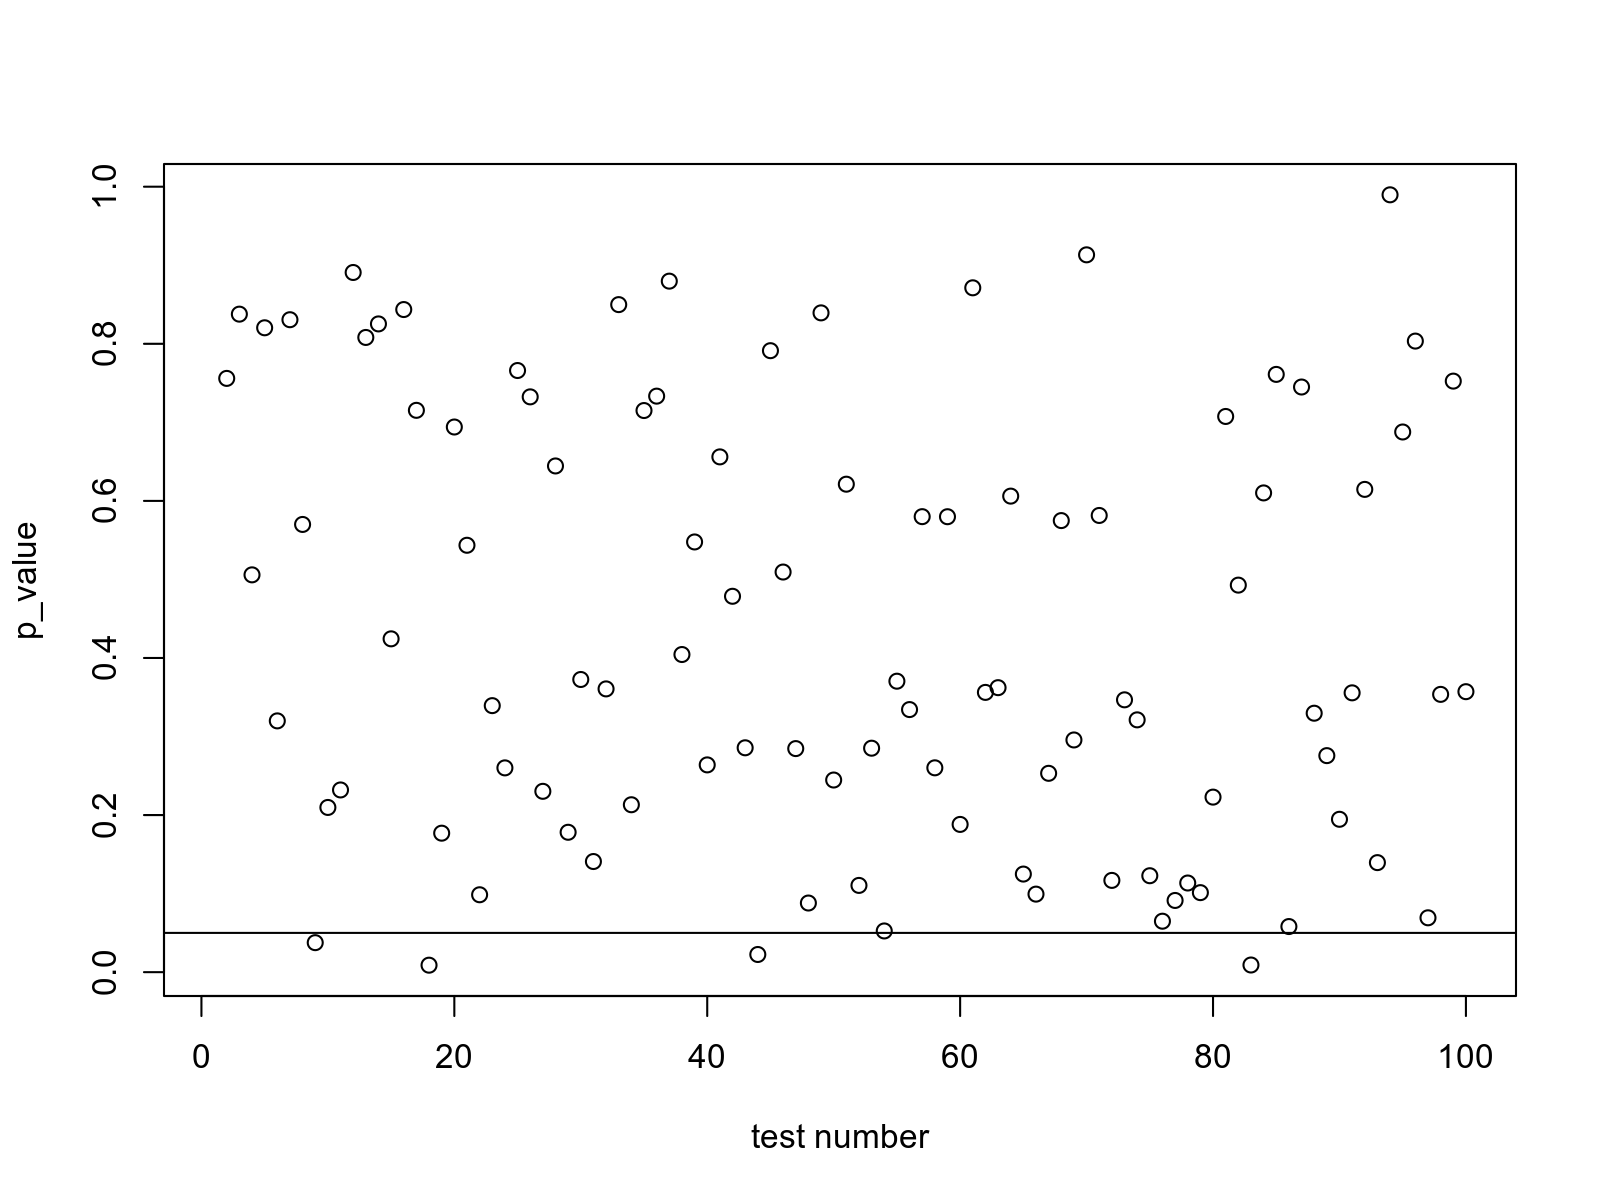

In [8]:
n_rep = 100 #100 tests repeated
n_per_group = 10#10 persons in each group
vector_p_values = NULL
for (i in 2:n_rep){
    grp1 = rnorm(n_per_group, mean_iq, std_iq)
    grp2 = rnorm(n_per_group, mean_iq, std_iq)
    vector_p_values[i] <- t.test(grp1,grp2)$p.value
}
plot(1:n_rep, vector_p_values, xlab='test number', ylab='p_value')
abline(h=0.05)


### Now what if we increase sample size to e.g. 1000 per group ?

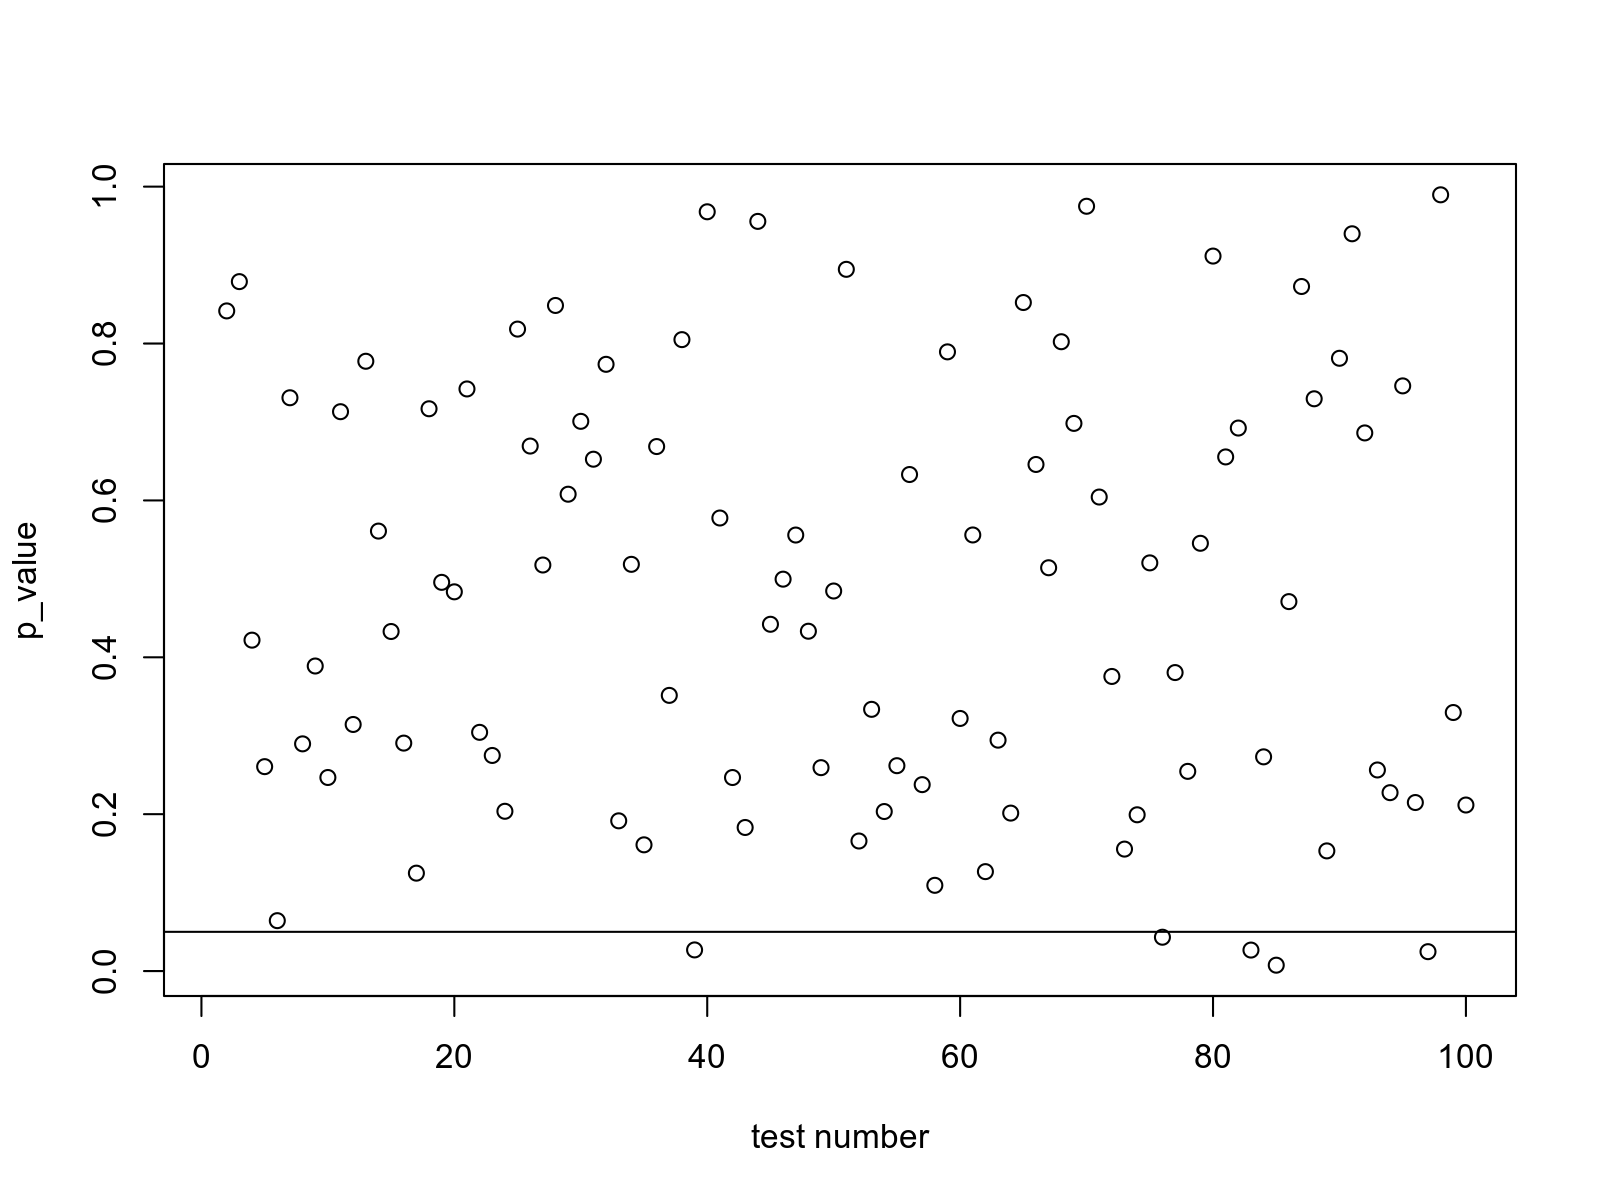

In [9]:
n_rep = 100 #Up to 100 tests repeated
n_per_group = 1000 # INCREASED TO 1000
vector_p_values = NULL
for (i in 2:n_rep){
    grp1 = rnorm(n_per_group, mean_iq, std_iq)
    grp2 = rnorm(n_per_group, mean_iq, std_iq)
    vector_p_values[i] <- t.test(grp1,grp2)$p.value
}
plot(1:n_rep, vector_p_values, xlab='test number', ylab='p_value')
abline(h=0.05)


### What if we induce a difference ? i.e.  $H_1$ is true

> Try it yourself, induce a difference on a t.test using rnorm()


Reminder :

In [10]:
t.test(rnorm(10, mean_iq, std_iq),rnorm(10, mean_iq, std_iq))


	Welch Two Sample t-test

data:  rnorm(10, mean_iq, std_iq) and rnorm(10, mean_iq, std_iq)
t = 1.9466, df = 17.576, p-value = 0.06775
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8417643 21.5868764
sample estimates:
mean of x mean of y 
103.90774  93.53519 


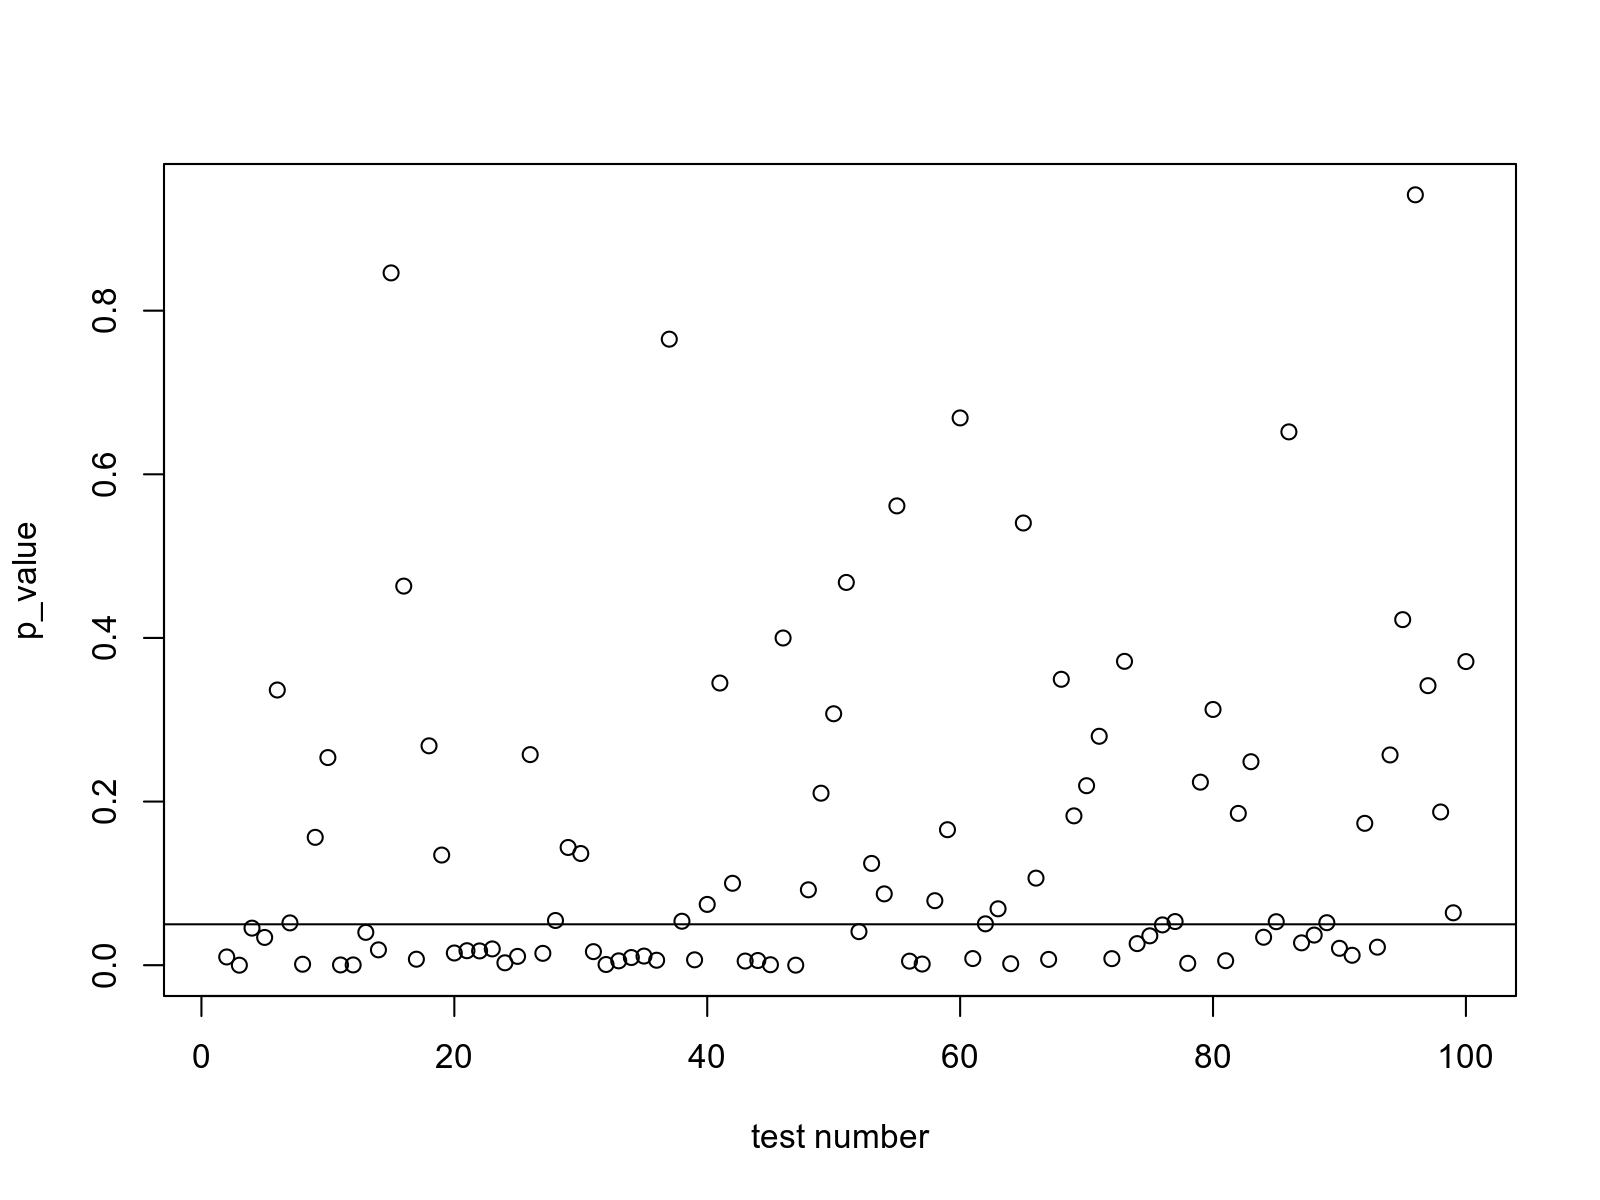

In [11]:
n_rep = 100 #100 tests repeated
n_per_group = 10#10 persons in each group
vector_p_values = NULL
for (i in 2:n_rep){
    grp1 = rnorm(n_per_group, mean_iq, std_iq)
    grp2 = rnorm(n_per_group, mean_iq-std_iq, std_iq)#H1 is true
    vector_p_values[i] <- t.test(grp1,grp2)$p.value
}
plot(1:n_rep, vector_p_values, xlab='test number', ylab='p_value')
abline(h=0.05)


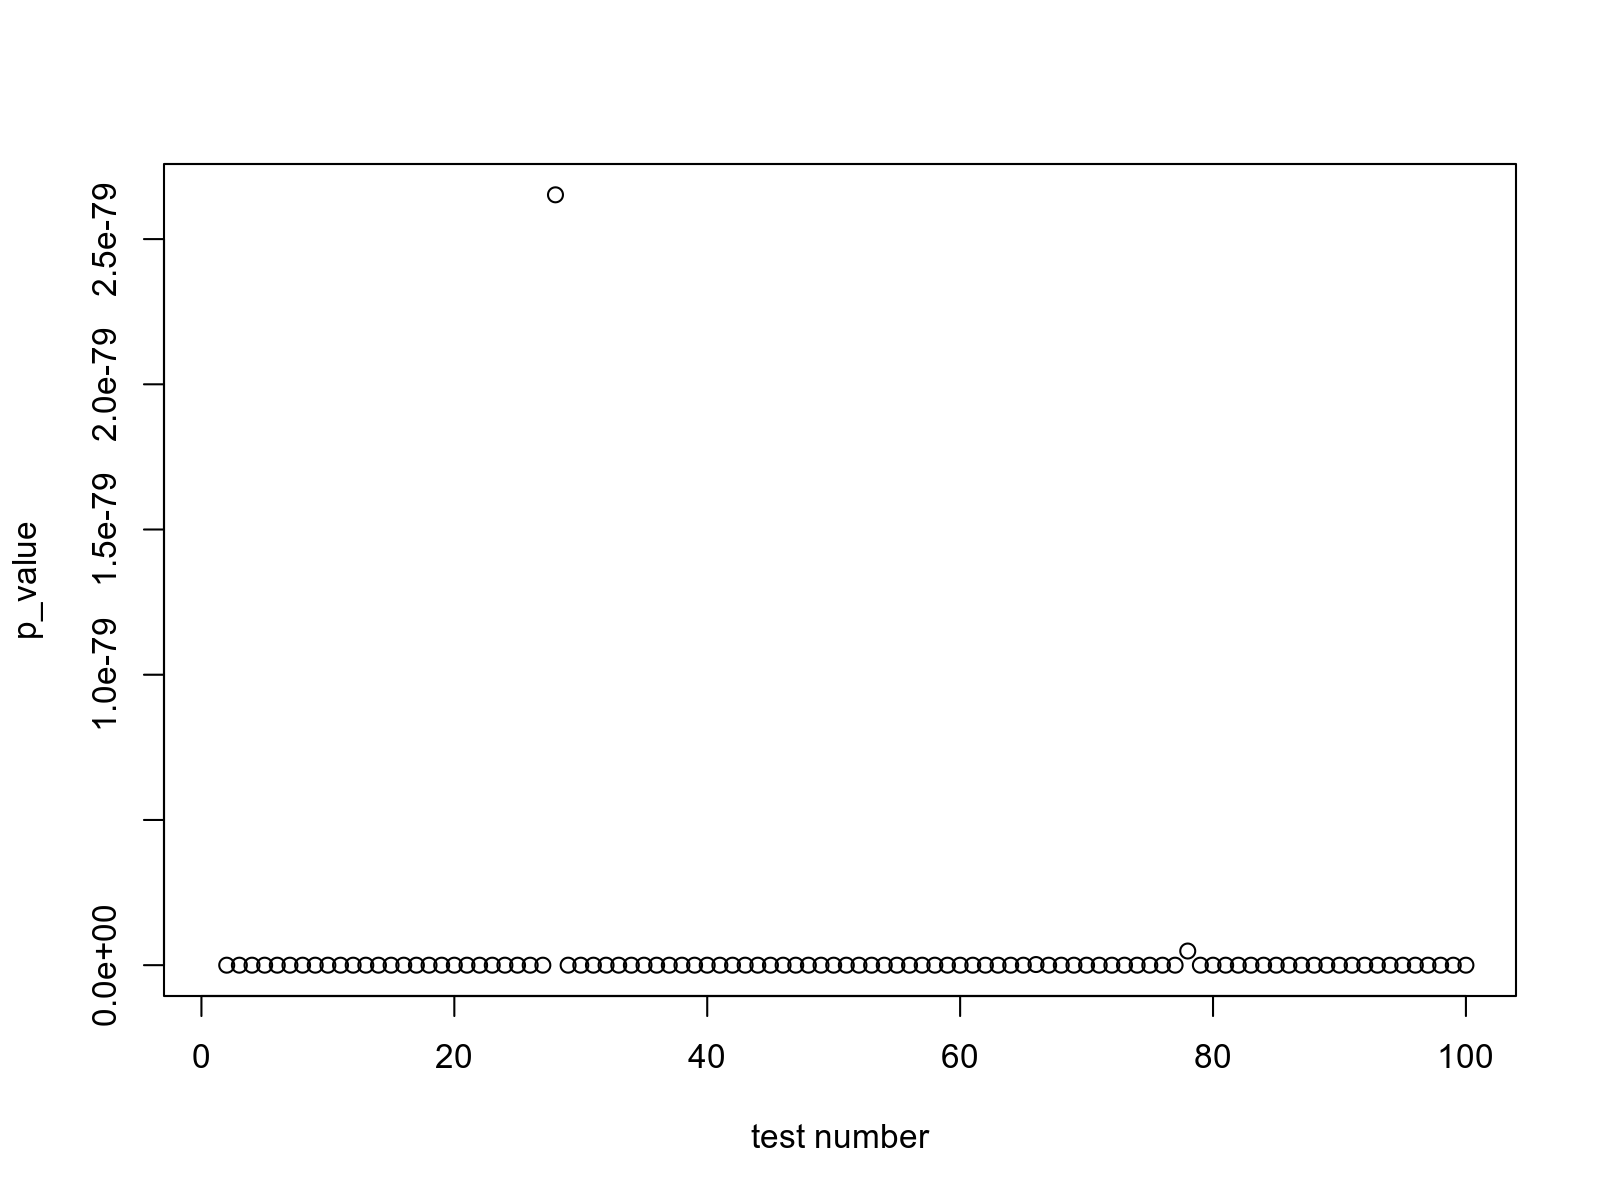

In [12]:
n_rep = 100 #100 tests repeated
n_per_group = 1000 # INCREASED TO 1000
vector_p_values = NULL
for (i in 2:n_rep){
    grp1 = rnorm(n_per_group, mean_iq, std_iq)
    grp2 = rnorm(n_per_group, mean_iq-std_iq, std_iq)
    vector_p_values[i] <- t.test(grp1,grp2)$p.value
}
plot(1:n_rep, vector_p_values, xlab='test number', ylab='p_value')
abline(h=0.05)


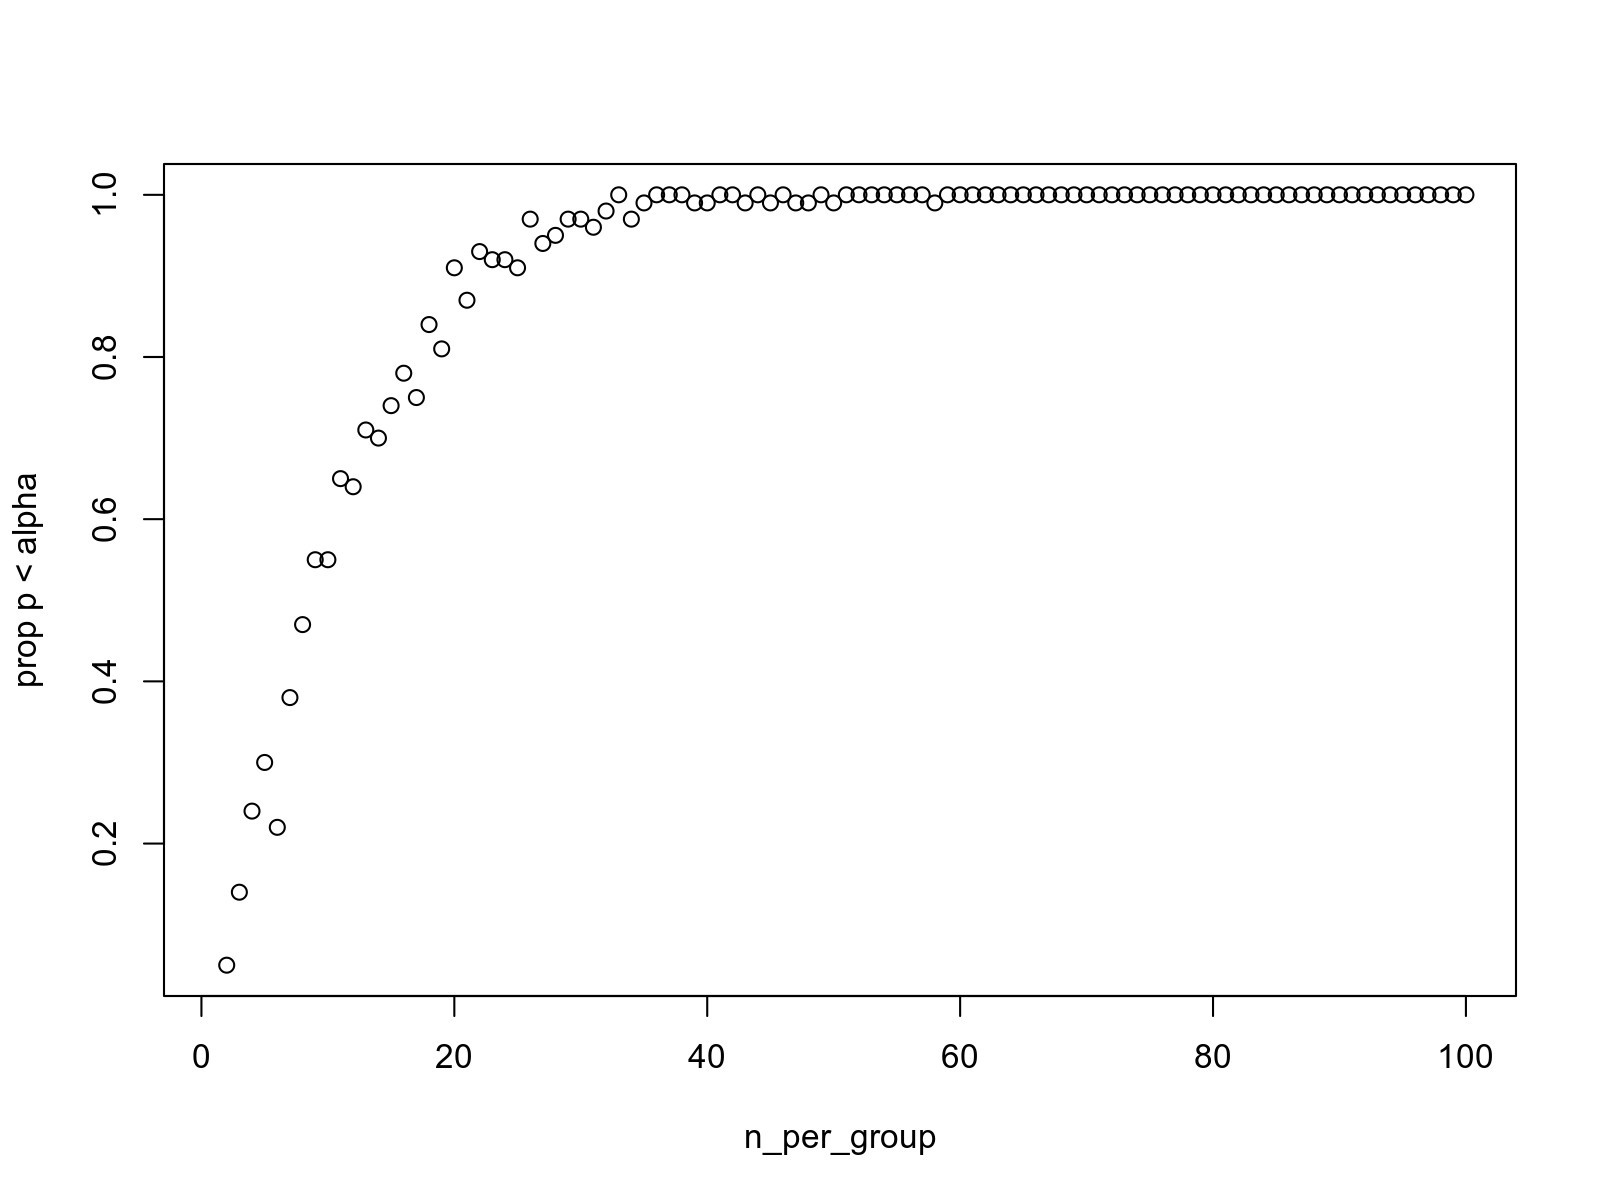

In [13]:
n_rep = 100 
max_n_per_group = 100
alpha = 0.05 # Significance threshold
vector_p_values = NULL
for (n_i in 2:max_n_per_group){#CHANGED
    p_val_for_n_i = NULL
    for (i in 1:n_rep){
        grp1 = rnorm(n_i, mean_iq, std_iq)
        grp2 = rnorm(n_i, mean_iq-std_iq, std_iq)
        p_val_for_n_i[i] <- ifelse(t.test(grp1,grp2)$p.value < alpha, 1, 0)
        }
    vector_p_values[n_i] <- mean(p_val_for_n_i)
}
plot(1:max_n_per_group, vector_p_values, xlab='n_per_group', ylab='prop p < alpha')


> Play with the alpha level

In [14]:
vector_p_values_at_alpha5 = vector_p_values

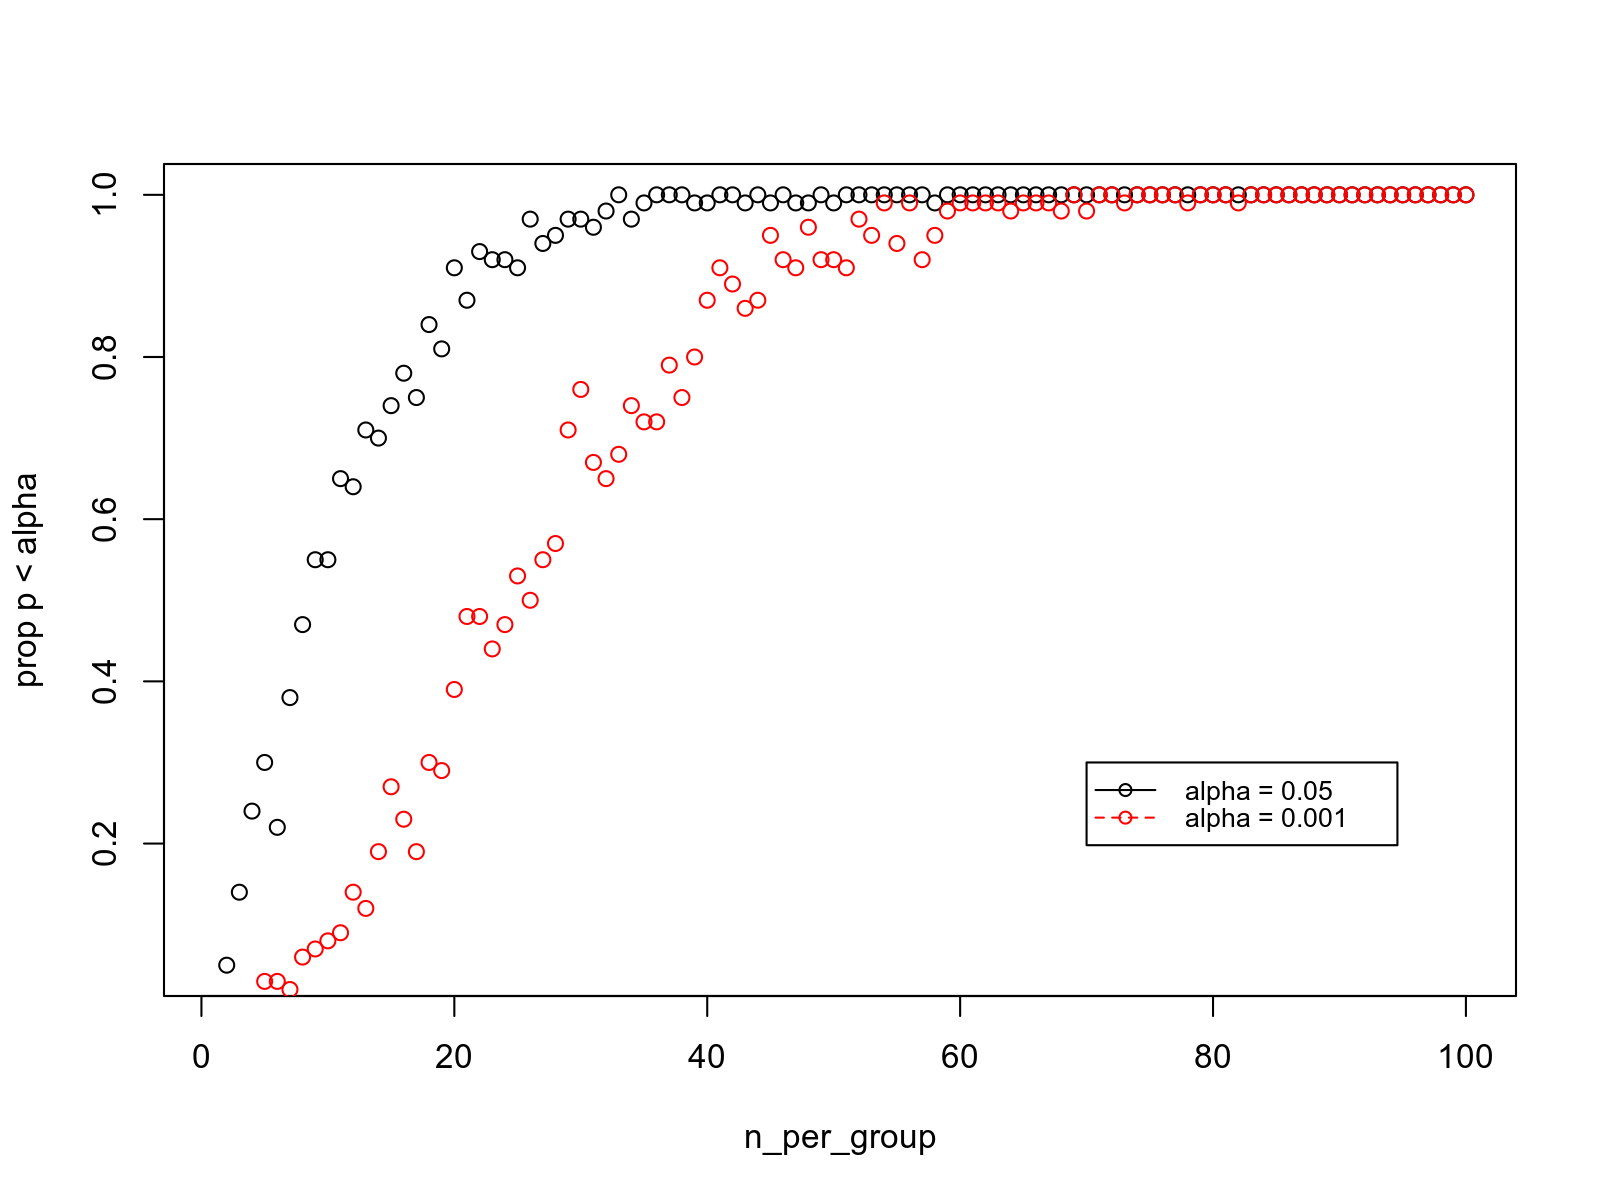

In [15]:
n_rep = 100 
max_n_per_group = 100
alpha = 0.001 # Significance threshold
vector_p_values = NULL
for (n_i in 2:max_n_per_group){#CHANGED
    p_val_for_n_i = NULL
    for (i in 1:n_rep){
        grp1 = rnorm(n_i, mean_iq, std_iq)
        grp2 = rnorm(n_i, mean_iq-std_iq, std_iq)
        p_val_for_n_i[i] <- ifelse(t.test(grp1,grp2)$p.value < alpha, 1, 0)
        }
    vector_p_values[n_i] <- mean(p_val_for_n_i)
}
plot(1:max_n_per_group, vector_p_values_at_alpha5, xlab='n_per_group', ylab='prop p < alpha')
points(1:max_n_per_group, vector_p_values, col='red', xlab='n_per_group', ylab='prop p < alpha')

legend(70, 0.3, legend=c("alpha = 0.05", "alpha = 0.001"),
       col=c("black", "red"), lty=1:2, cex=0.8, pch=1)

## What about confidence intervals ? 

In [16]:
t.test(rnorm(10, mean_iq, std_iq),rnorm(10, mean_iq, std_iq))


	Welch Two Sample t-test

data:  rnorm(10, mean_iq, std_iq) and rnorm(10, mean_iq, std_iq)
t = -1.4477, df = 18, p-value = 0.1649
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -20.287538   3.734303
sample estimates:
mean of x mean of y 
 98.09508 106.37170 


Definition ?

Lets test it

In [17]:
n_rep = 100 #100 tests repeated
n_per_group = 10#10 persons in each group
matrix_ci_values = NULL
for (i in 1:n_rep){
    grp1 = rnorm(n_per_group, mean_iq, std_iq)
    grp2 = rnorm(n_per_group, mean_iq-std_iq, std_iq)#H1 is true
    matrix_ci_values <- rbind(matrix_ci_values,matrix(c(t.test(grp1,grp2)$conf.int[1],t.test(grp1,grp2)$conf.int[2]), ncol=2,nrow=1) )
}


Introducing if/else

In [18]:
ci_corr = NULL
ci_incorr = NULL
for (row in 1:nrow(matrix_ci_values)){ #Iterate through rows, Dirty but pedagogical
        if (std_iq %in% round(seq(matrix_ci_values[row,1],matrix_ci_values[row,2]))){
            ci_corr <- rbind(ci_corr, matrix_ci_values[row,])
        } else {
            ci_incorr <- rbind(ci_incorr, matrix_ci_values[row,])
        }
}

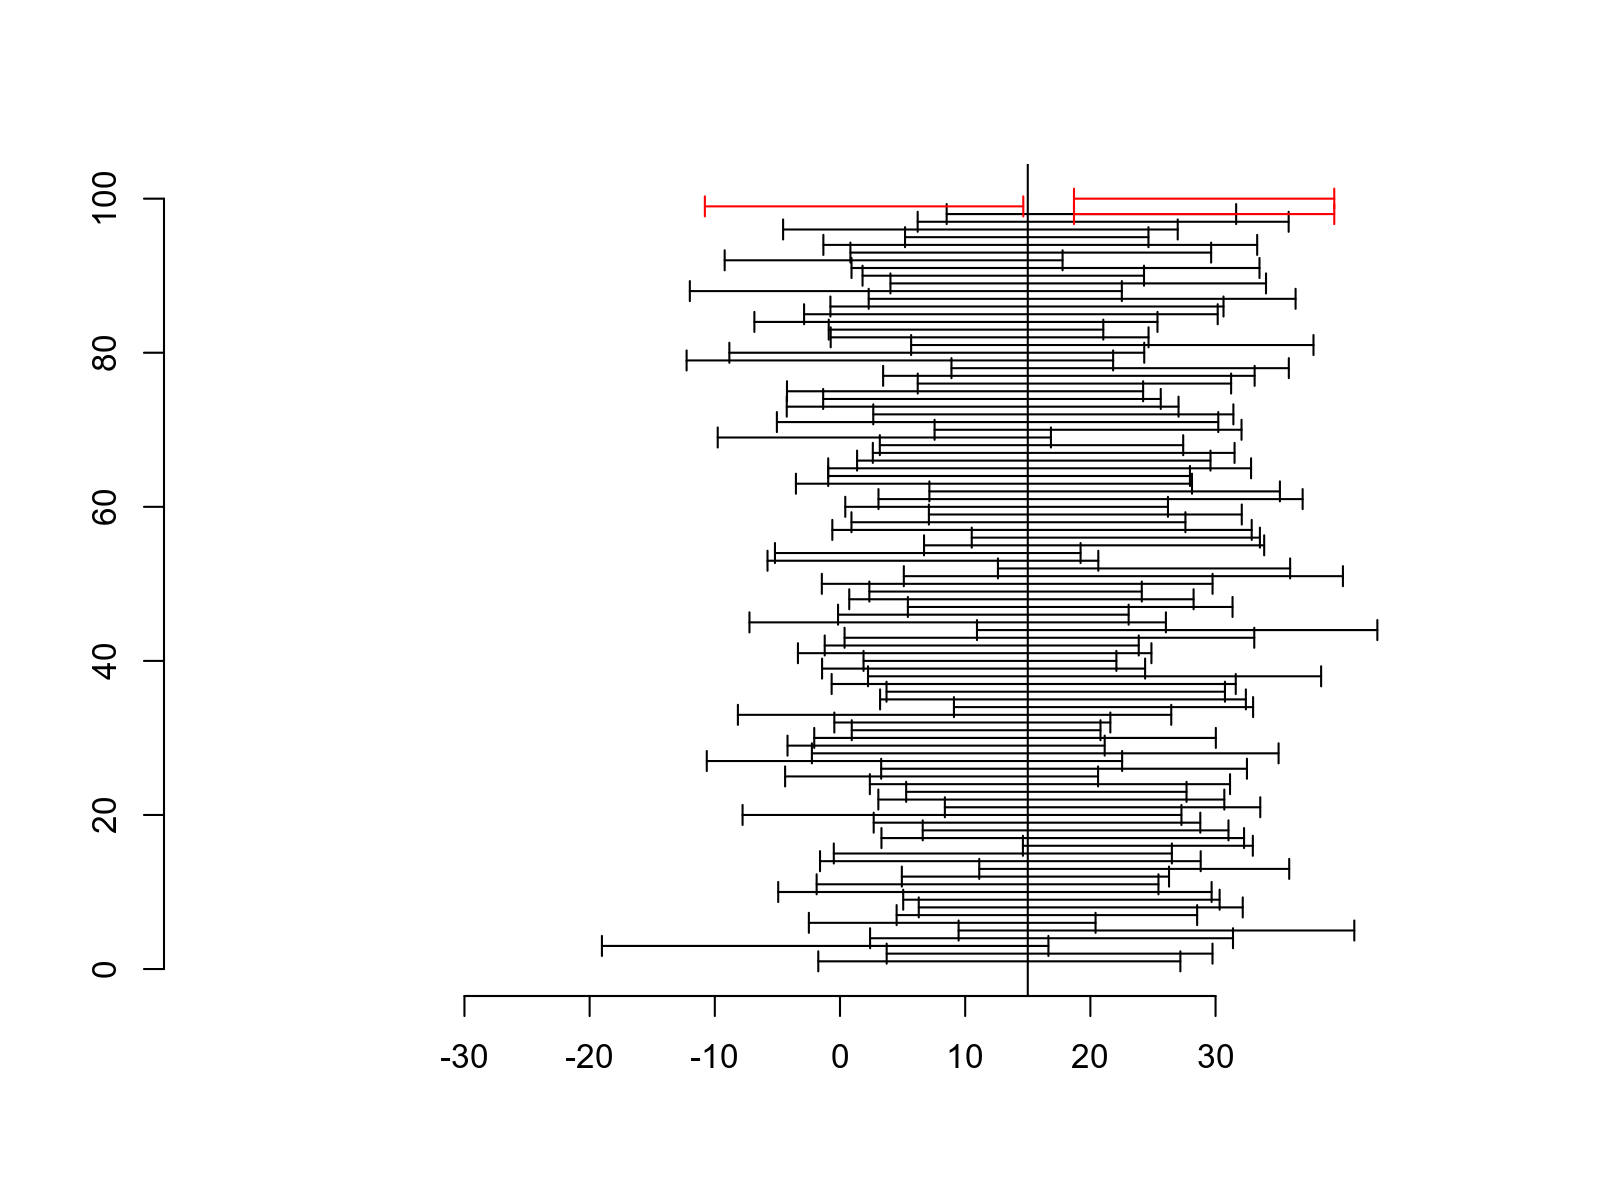

In [19]:
#Graphical  parameters
plot.new()
plot.window(xlim=c(-50,50), ylim=c(0.5, 100+.5), ylab="a")
axis(1, at=seq(-30, 30, by=10))
axis(2, at=seq(0, 100, by=20))

#Plotting correct CI vs incorrect
arrows(ci_corr[,1], 1:nrow(ci_corr), ci_corr[,2], 1:nrow(ci_corr), code=3, length=0.05, angle=90)
arrows(ci_incorr[,1], nrow(ci_corr):(nrow(ci_incorr)+nrow(ci_corr)), ci_incorr[,2],  
       nrow(ci_corr):(nrow(ci_incorr)+nrow(ci_corr)), code=3, length=0.05, angle=90,col="red")
#Plotting true effect as a line
abline(v=std_iq)

The true effect is contained in 95\% of the CIs

# Moving to a real psychological experiment

In [20]:
library(curl)#library shipped with R-recommended install, used to download from URL

In [21]:
download.file("https://raw.githubusercontent.com/GWeindel/DecomposingRT/master/Raw_data/markers/MRK_SAT_M2.csv", 
    destfile = "test.csv", method = "curl")#Downloading to test.csv

In [22]:
head(read.csv2("test.csv",sep=","),2)#Reading csv and displaying first two rows

,participant,contraste,condition,expdResp,trialType,response,nbrA,CA,IA,rt,pmt,mt,Apmt,FlaTime,ForceTime,chanEMG1,trial,givenResp,com,EMGtrial
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,S16,1,Accuracy,Right,SA,1.0,1.0,1.0,0.0,1001.953125,901.85546875,100.09765625,901.85546875,,,,1,Right,0.0,C
2,S16,2,Accuracy,Right,SA,1.0,1.0,1.0,0.0,800.29296875,681.15234375,119.140625,681.15234375,,,,2,Right,0.0,C


In [23]:
ls()

[1] "alpha"                     "ci_corr"                  
 [3] "ci_incorr"                 "grp1"                     
 [5] "grp2"                      "i"                        
 [7] "matrix_ci_values"          "max_n_per_group"          
 [9] "mean_iq"                   "n_i"                      
[11] "n_per_group"               "n_rep"                    
[13] "p_val_for_n_i"             "row"                      
[15] "samples"                   "std_iq"                   
[17] "upper_bound"               "vector_mean_iq"           
[19] "vector_p_values"           "vector_p_values_at_alpha5"

In [24]:
df = read.csv2("test.csv",sep=",")
df = df[c("participant","contraste","condition","rt")]

In [25]:
head(df)

,participant,contraste,condition,rt
,<chr>,<int>,<chr>,<chr>
1,S16,1,Accuracy,1001.953125
2,S16,2,Accuracy,800.29296875
3,S16,1,Accuracy,700.68359375
4,S16,2,Accuracy,877.9296875
5,S16,3,Accuracy,938.4765625
6,S16,4,Accuracy,814.94140625


# Exploring your data

In [26]:
summary(df)

 participant          contraste  condition              rt           
 Length:33600       Min.   :1   Length:33600       Length:33600      
 Class :character   1st Qu.:2   Class :character   Class :character  
 Mode  :character   Median :3   Mode  :character   Mode  :character  
                    Mean   :3                                        
                    3rd Qu.:4                                        
                    Max.   :5                                        

In [27]:
df$rt = as.numeric(df$rt)

In [28]:
summary(df)

 participant          contraste  condition               rt          
 Length:33600       Min.   :1   Length:33600       Min.   :   2.441  
 Class :character   1st Qu.:2   Class :character   1st Qu.: 354.492  
 Mode  :character   Median :3   Mode  :character   Median : 435.059  
                    Mean   :3                      Mean   : 482.078  
                    3rd Qu.:4                      3rd Qu.: 560.059  
                    Max.   :5                      Max.   :1498.535  
                                                   NA's   :168       

In [29]:
unique(df$participant)

[1] "S16" "S13" "S17" "s3"  "S7"  "S15" "S9"  "S5"  "S6"  "S4"  "S14" "S2" 
[13] "S10" "S12"

In [30]:
unique(df$condition)

[1] "Accuracy" "Speed"

In [31]:
unique(df$contraste)

[1] 1 2 3 4 5

# Exploring your data

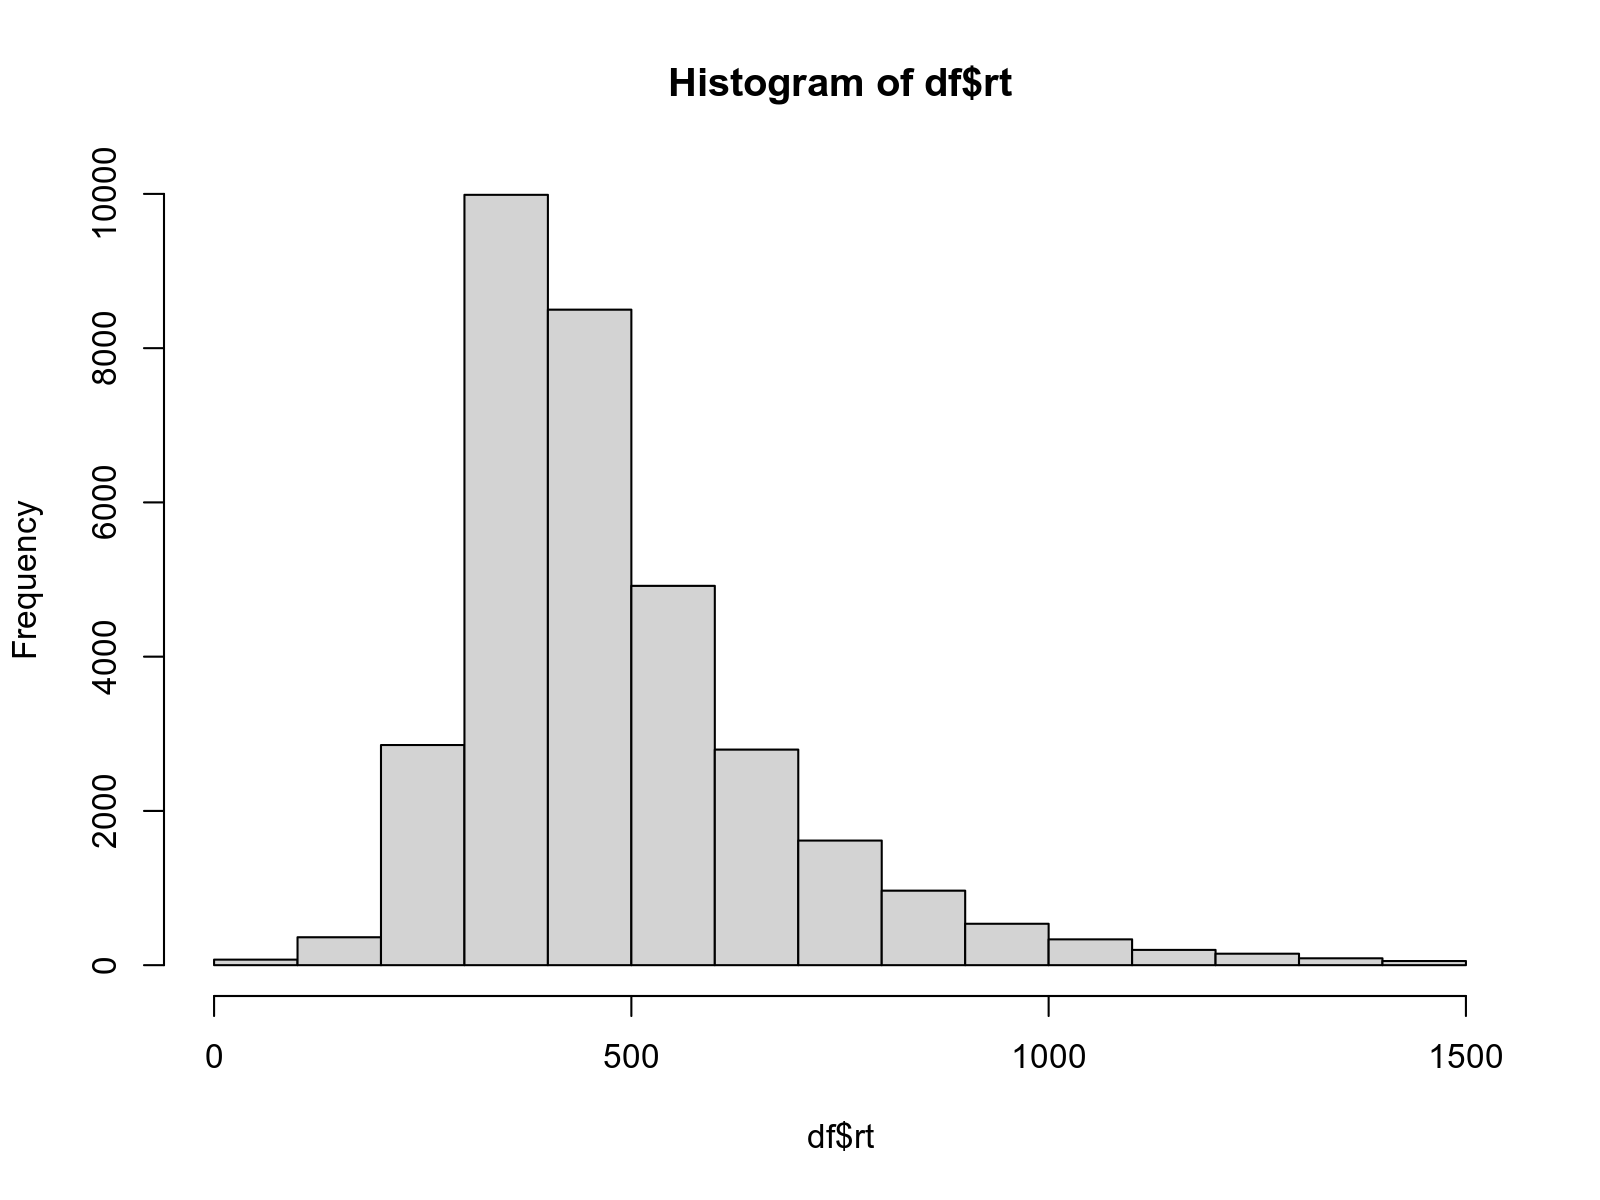

In [32]:
hist(df$rt)

But this is for the group, each individual has 2400 trials :

In [33]:
for (parti in unique(df$participant)){#Unefficient
    print(c(parti,length(df[df$participant == parti,'rt'])))
}
    

[1] "S16"  "2400"
[1] "S13"  "2400"
[1] "S17"  "2400"
[1] "s3"   "2400"
[1] "S7"   "2400"
[1] "S15"  "2400"
[1] "S9"   "2400"
[1] "S5"   "2400"
[1] "S6"   "2400"
[1] "S4"   "2400"
[1] "S14"  "2400"
[1] "S2"   "2400"
[1] "S10"  "2400"
[1] "S12"  "2400"


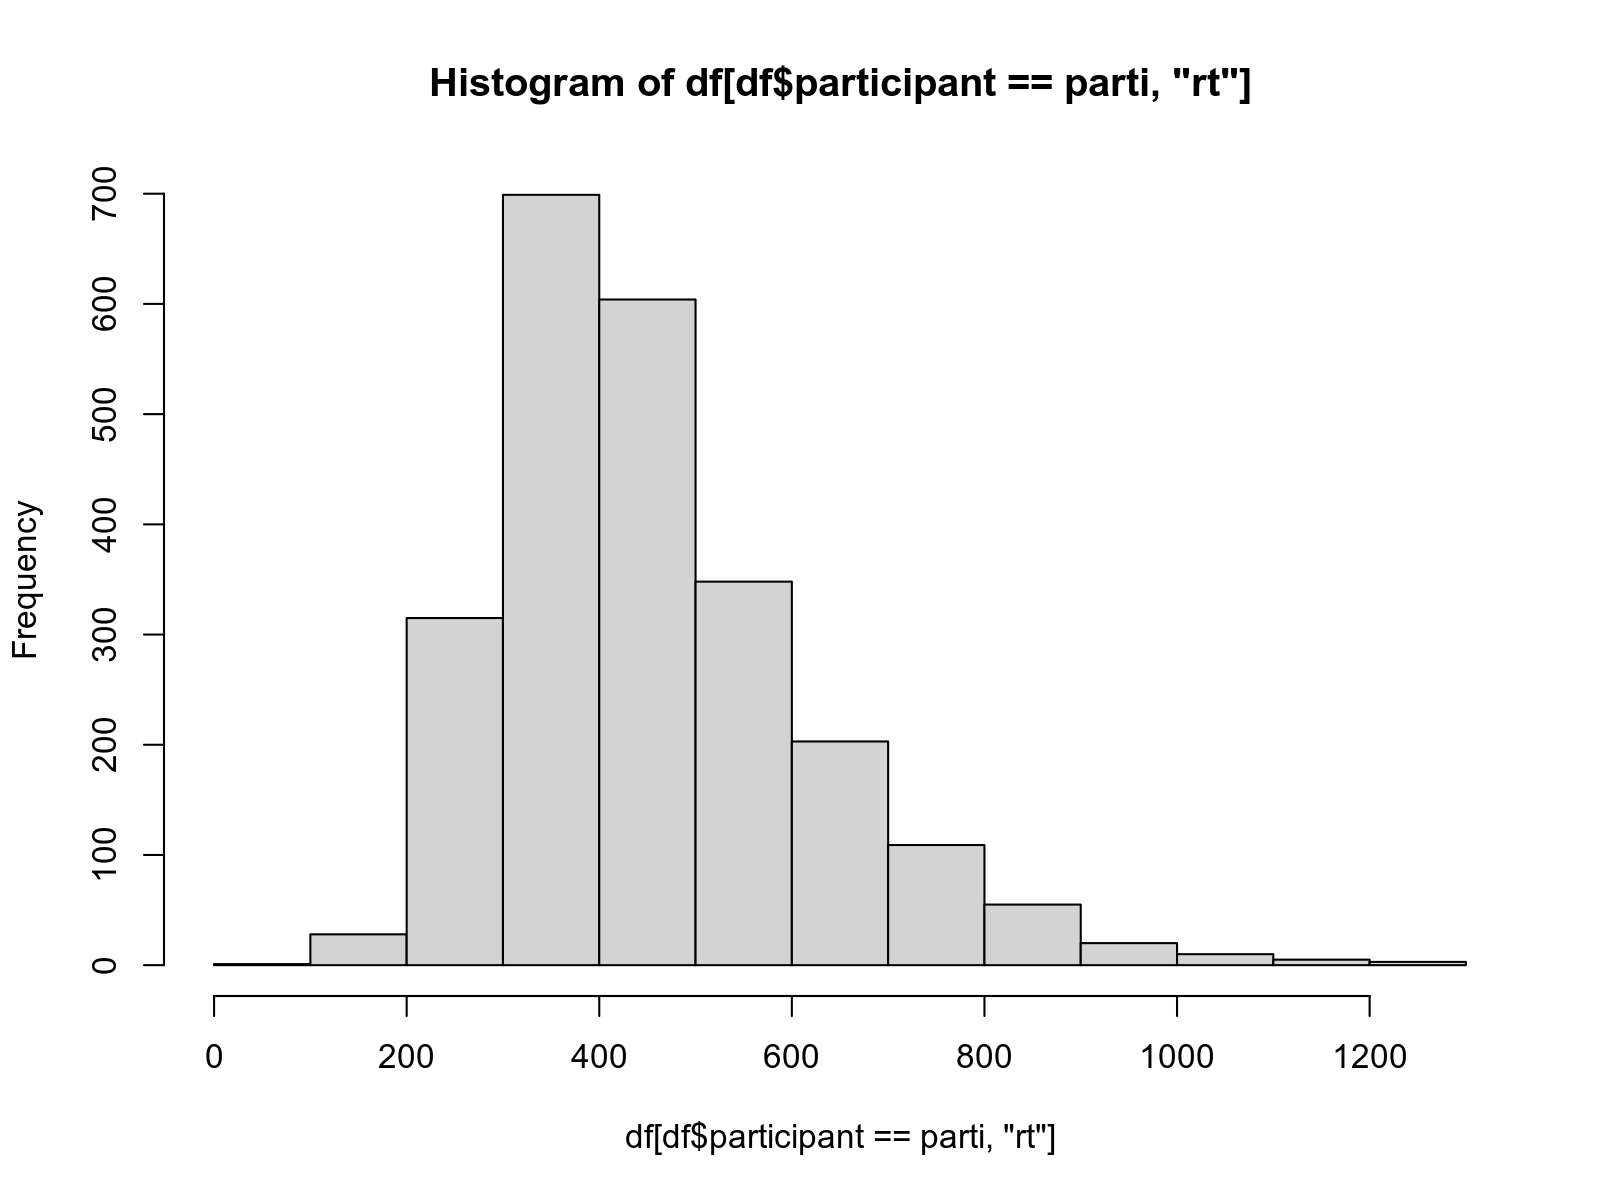

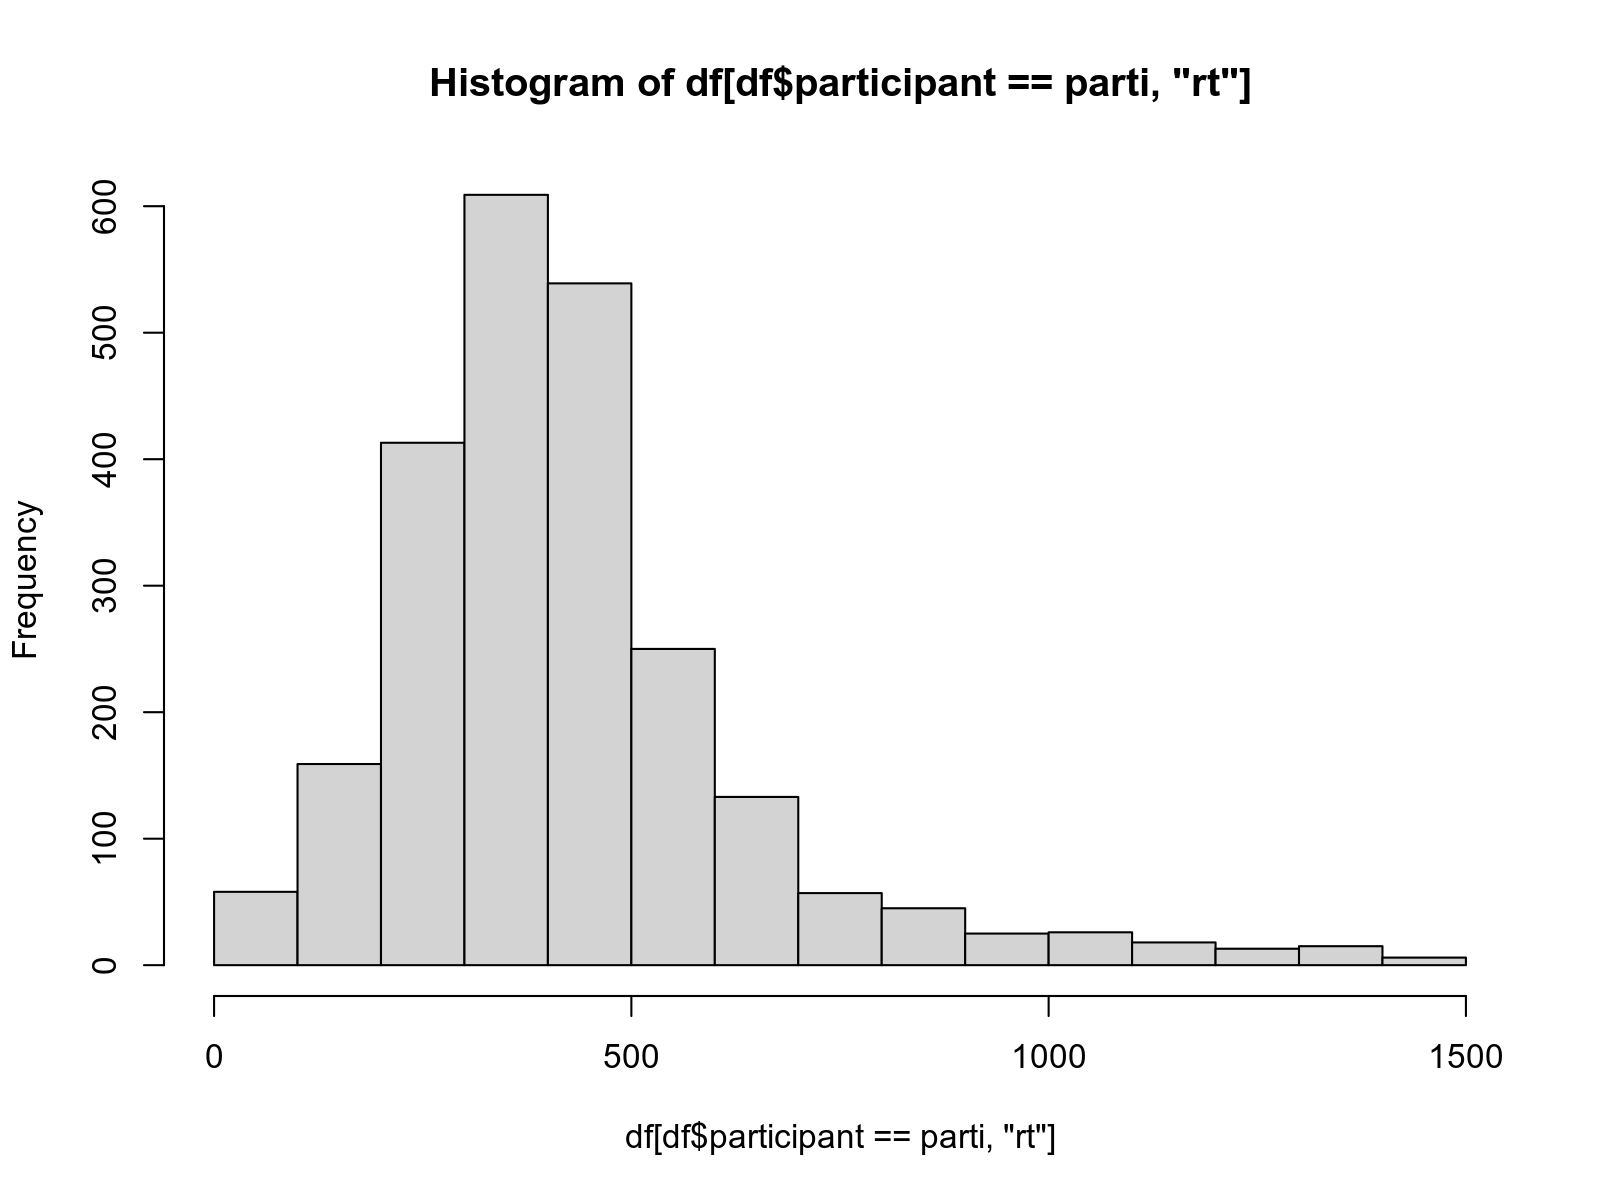

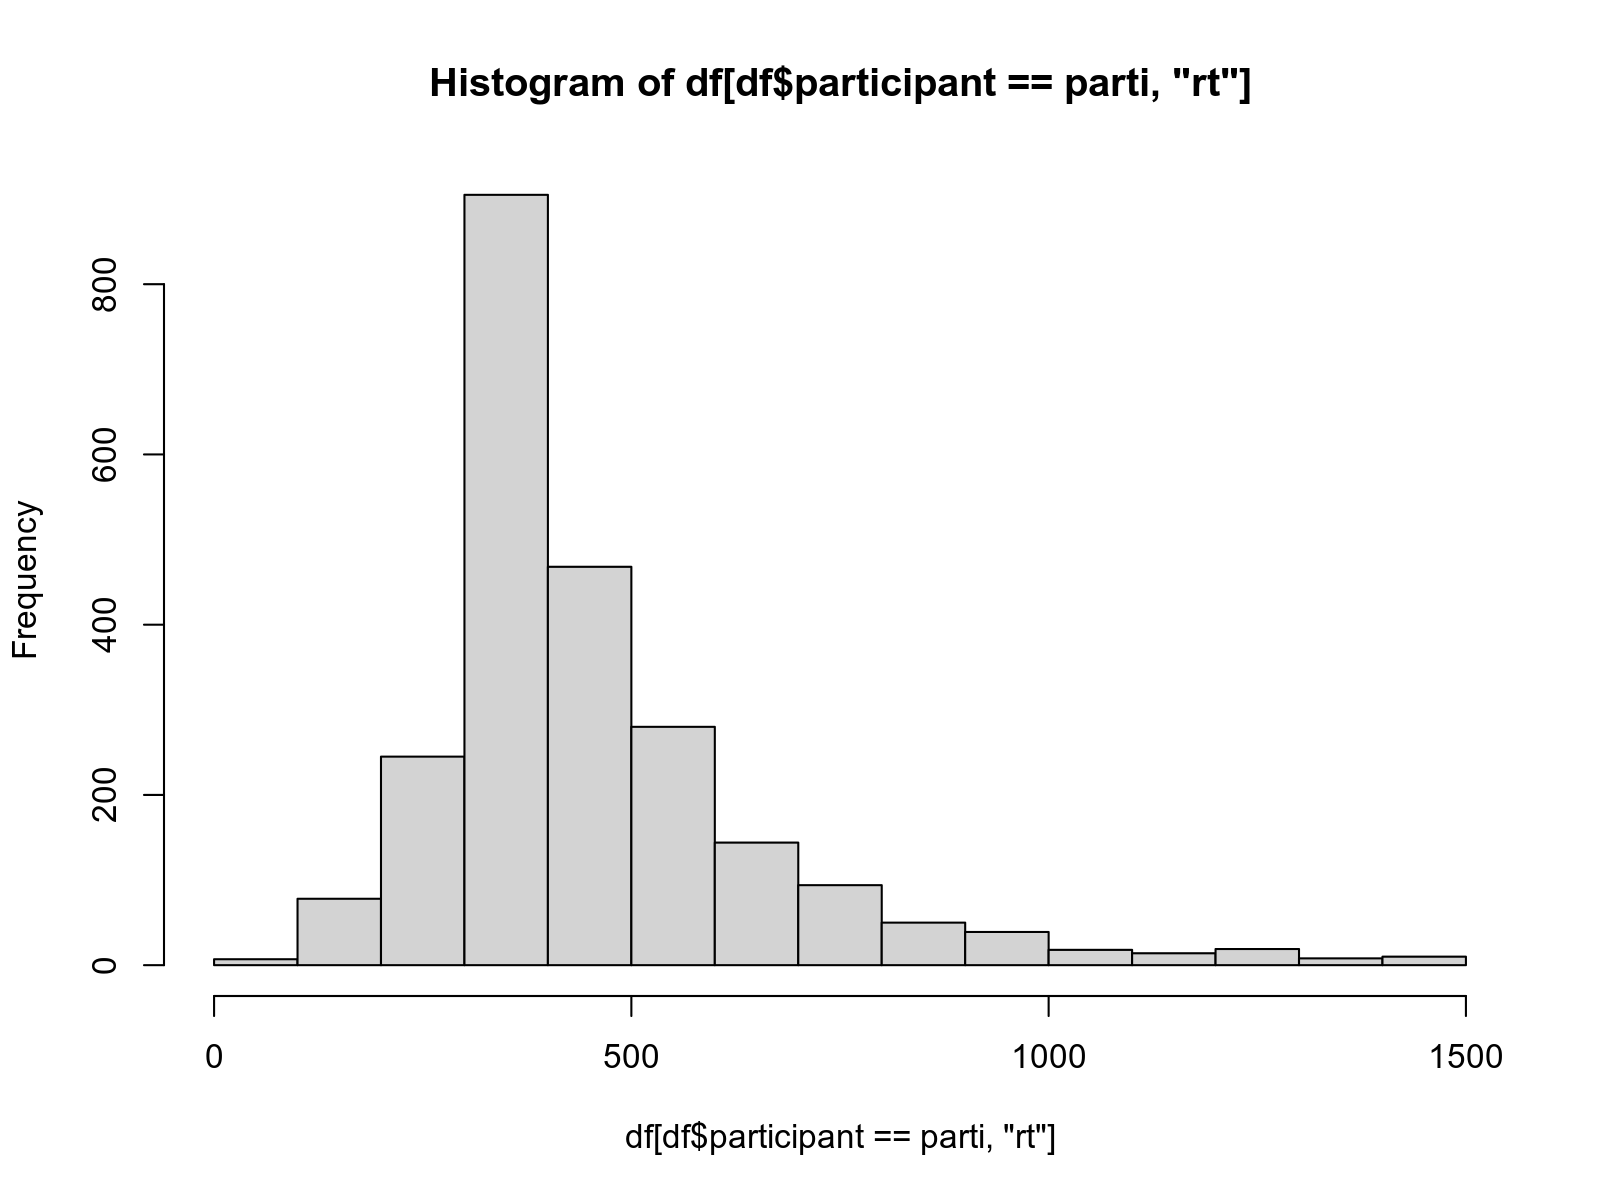

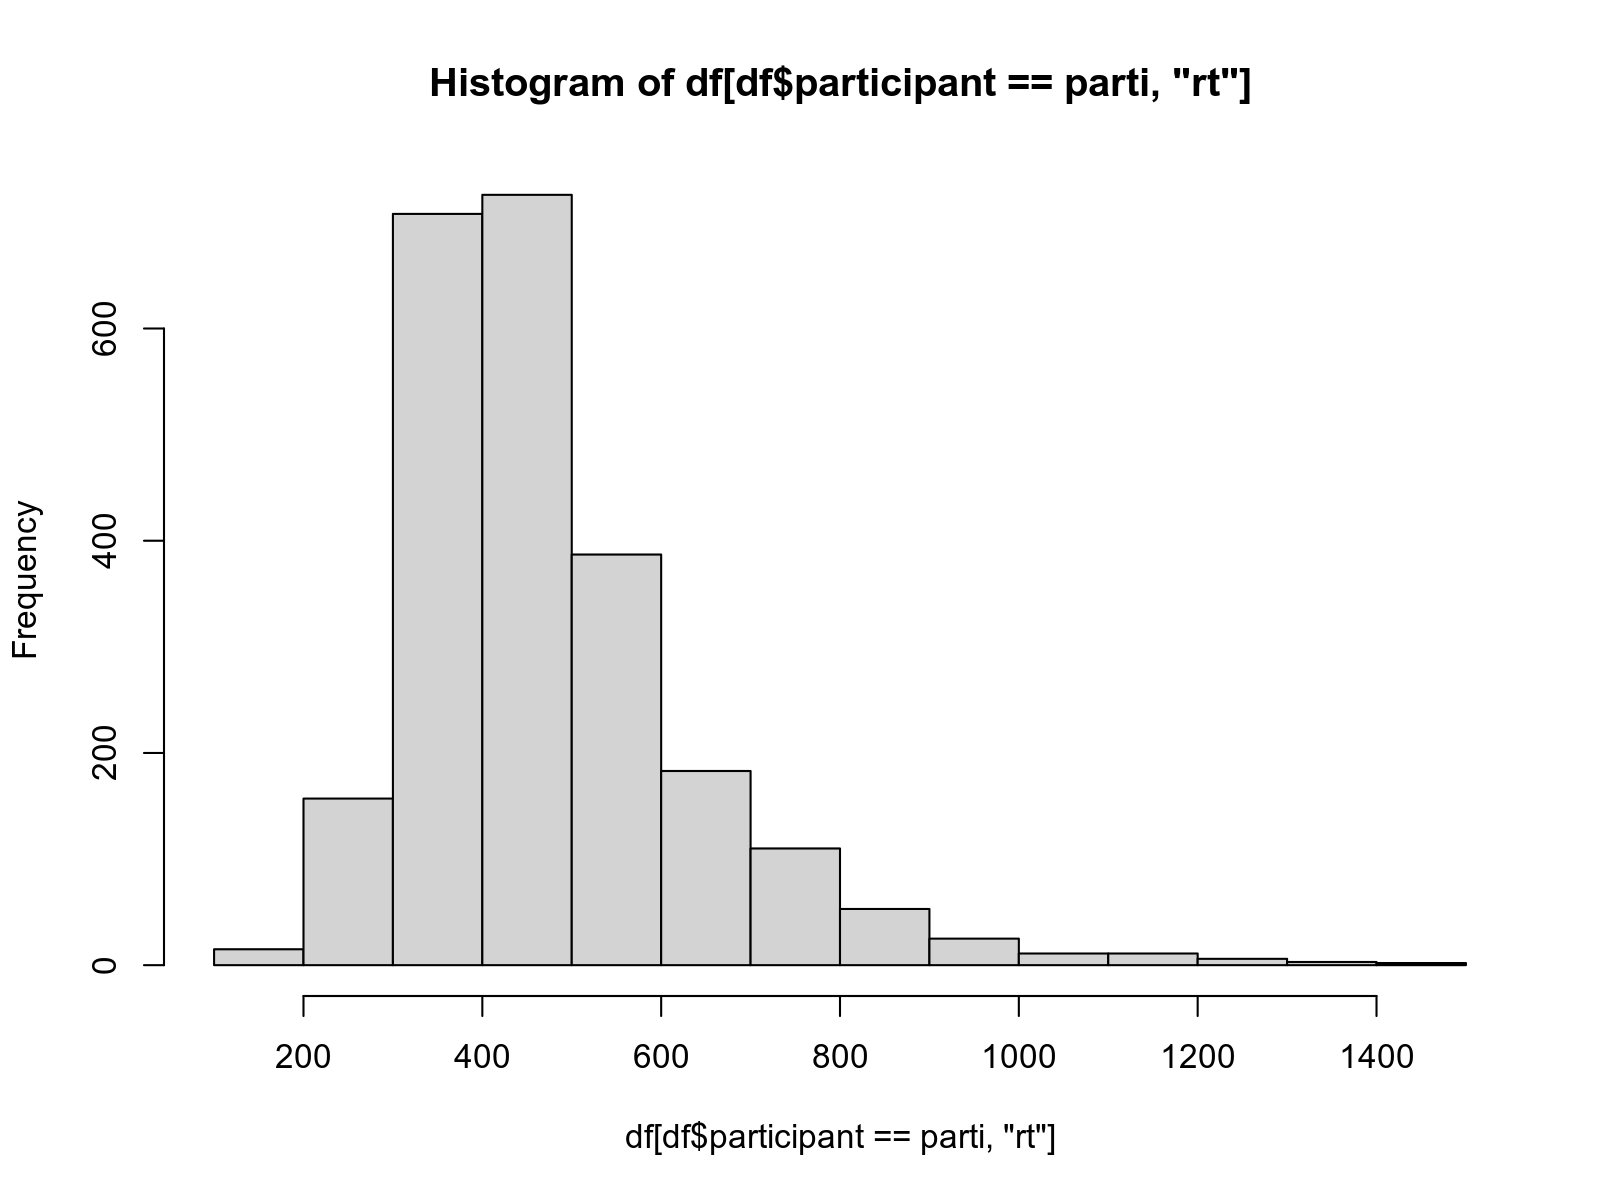

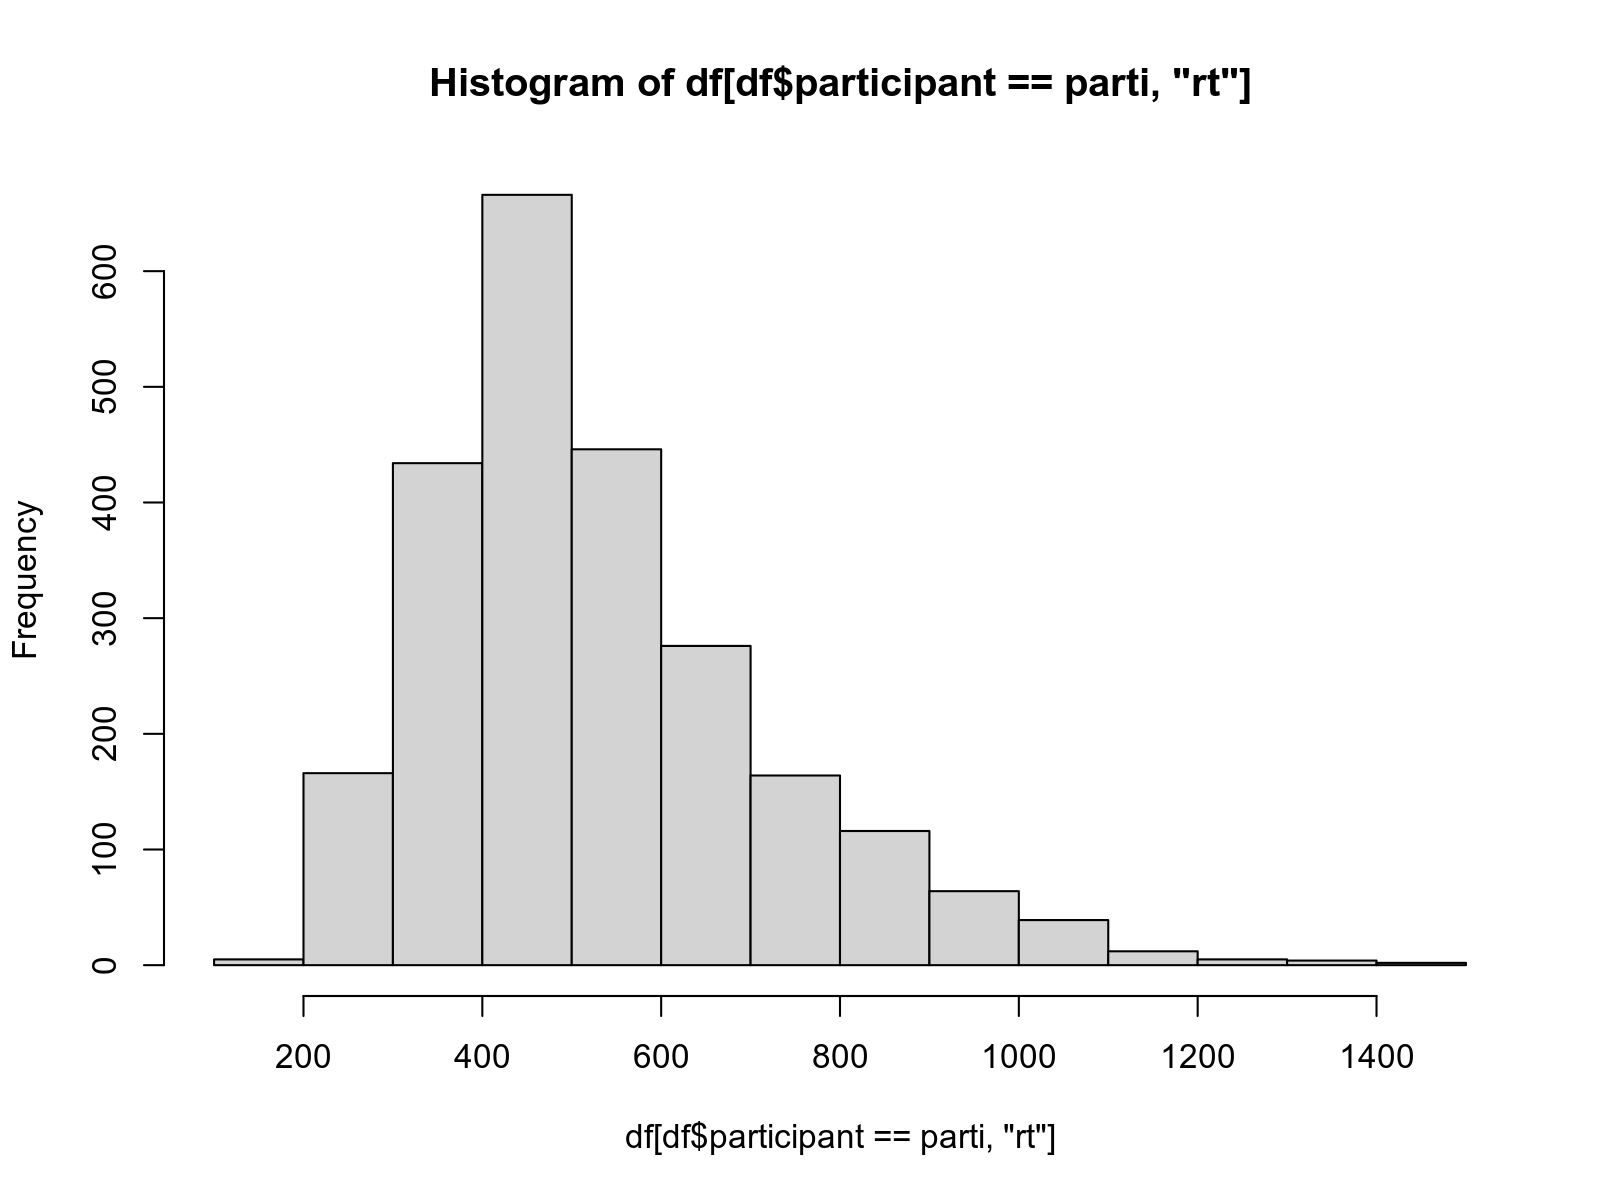

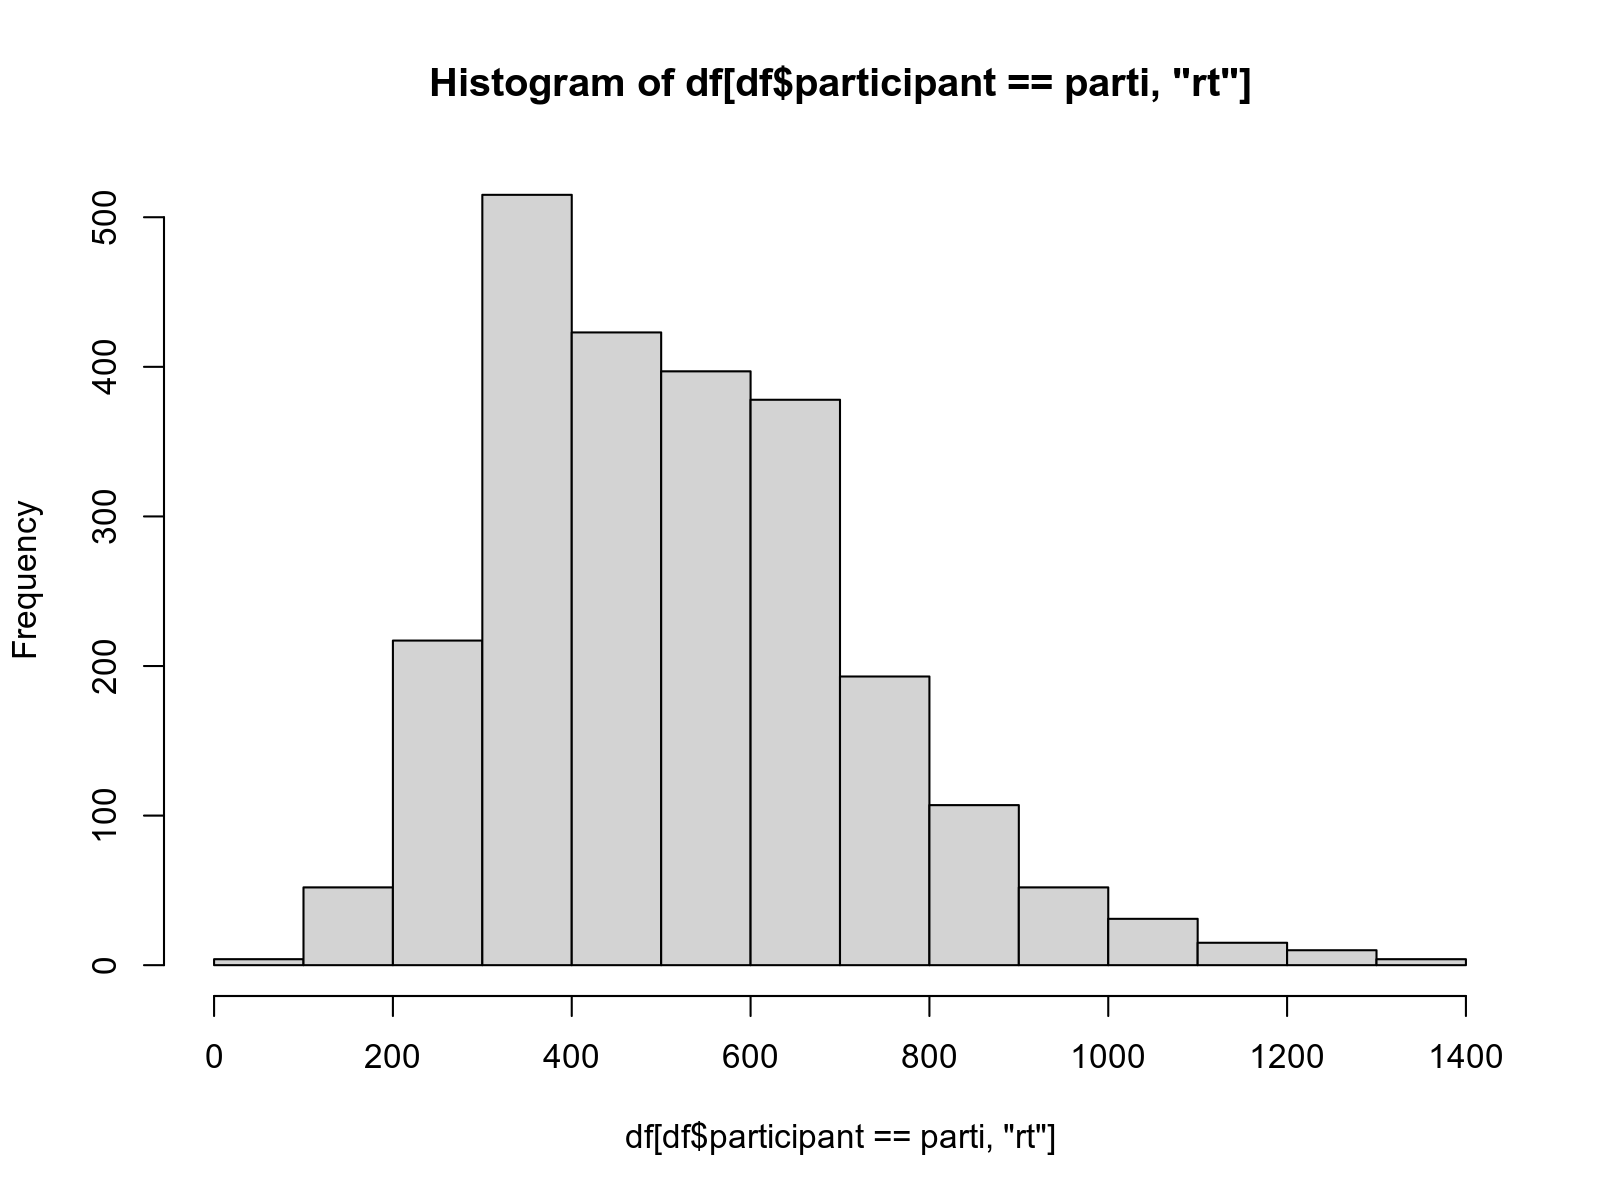

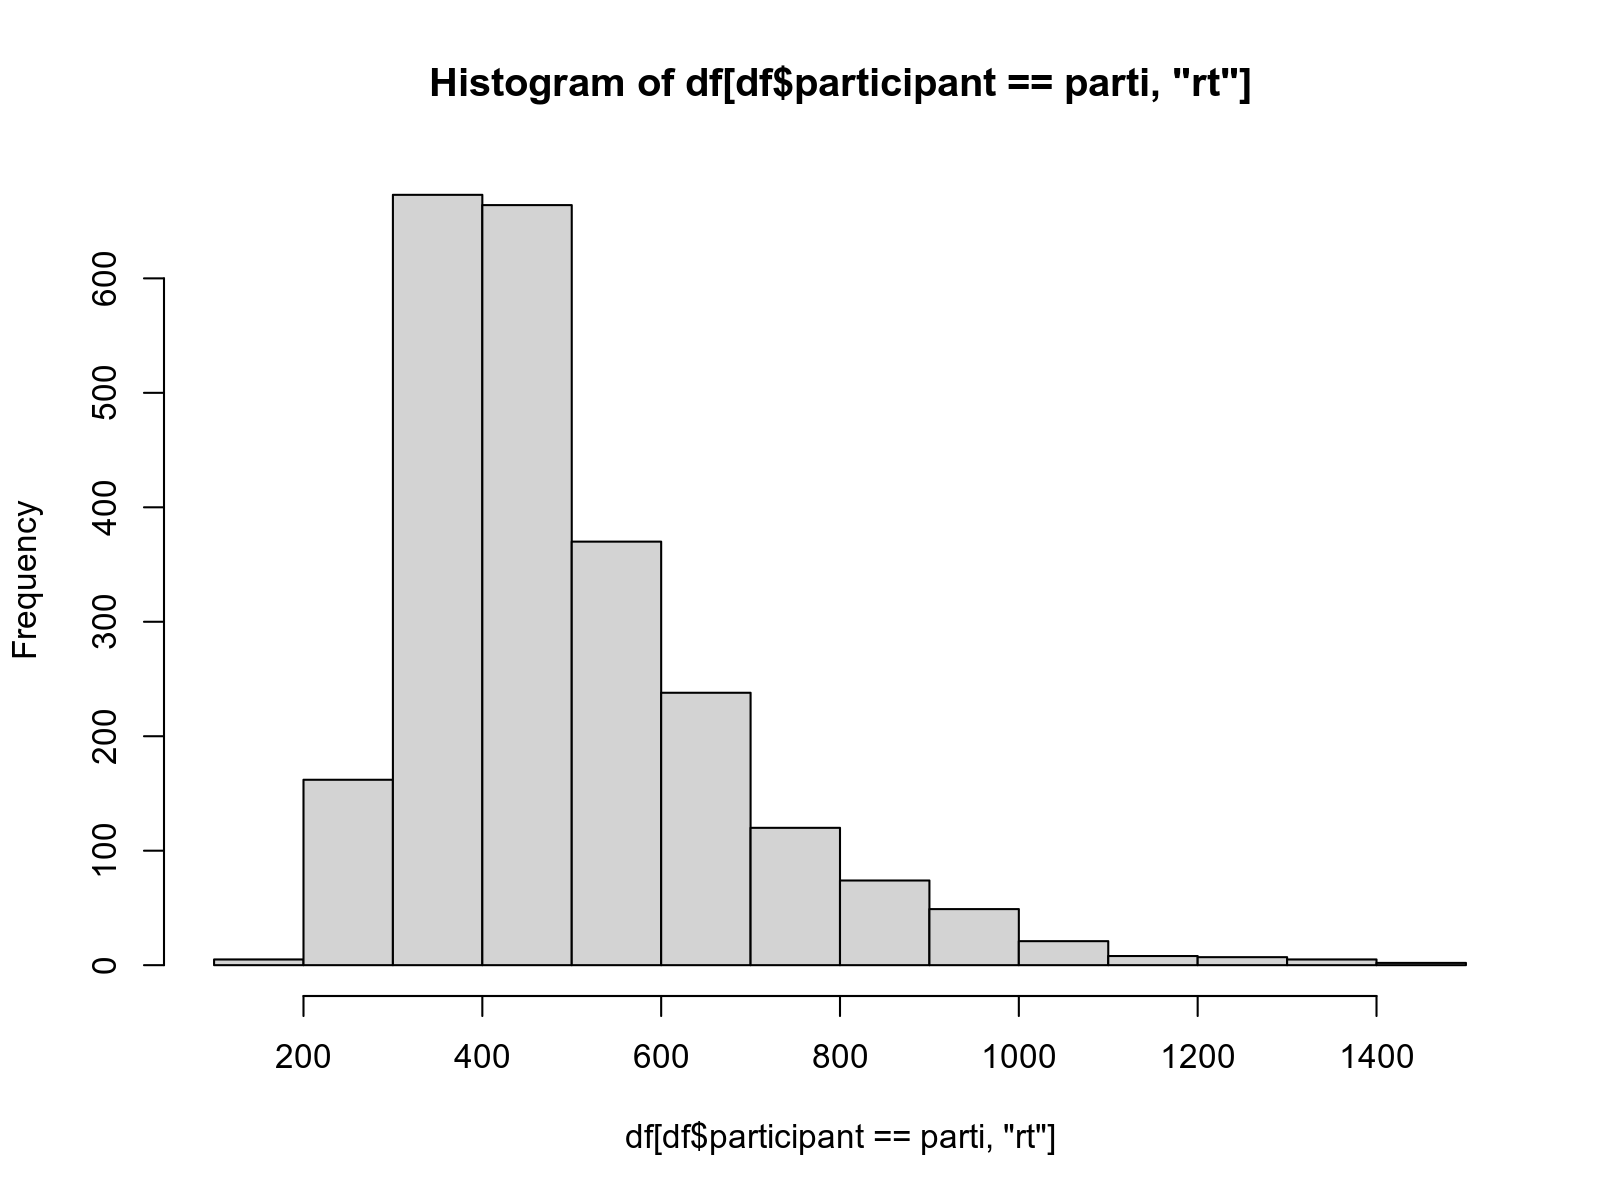

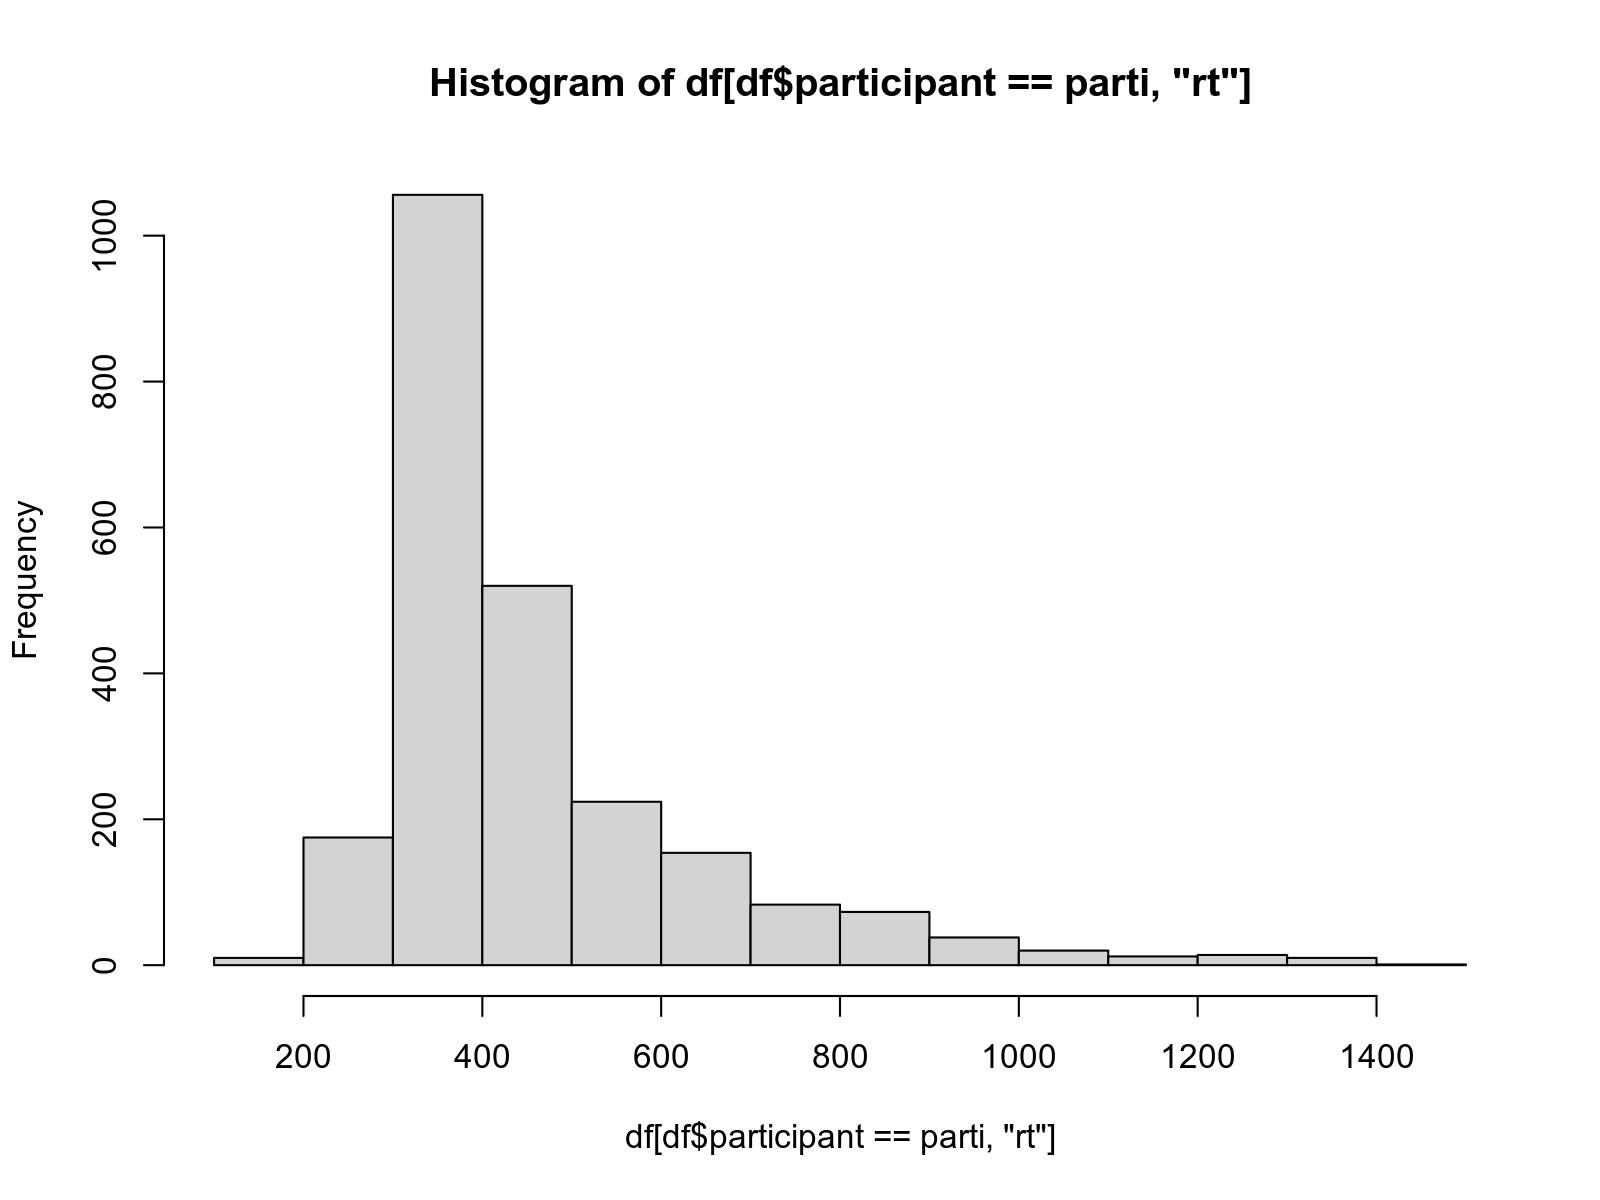

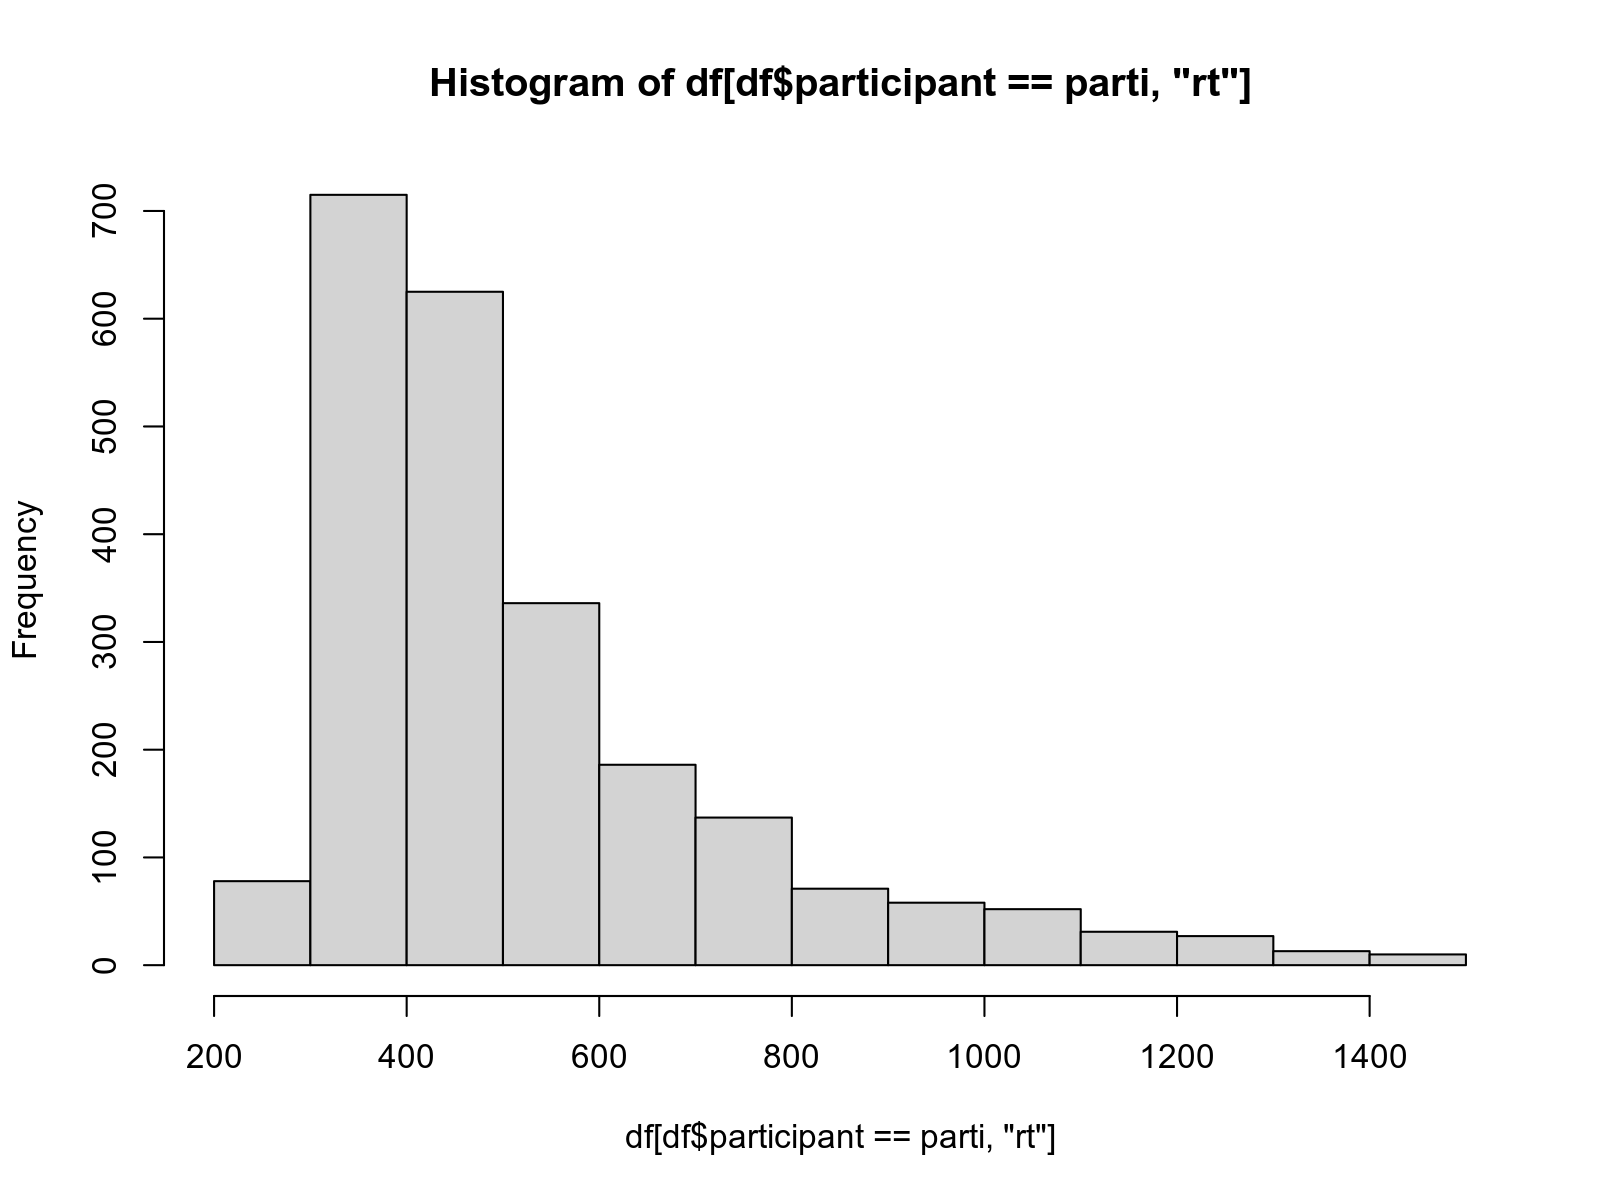

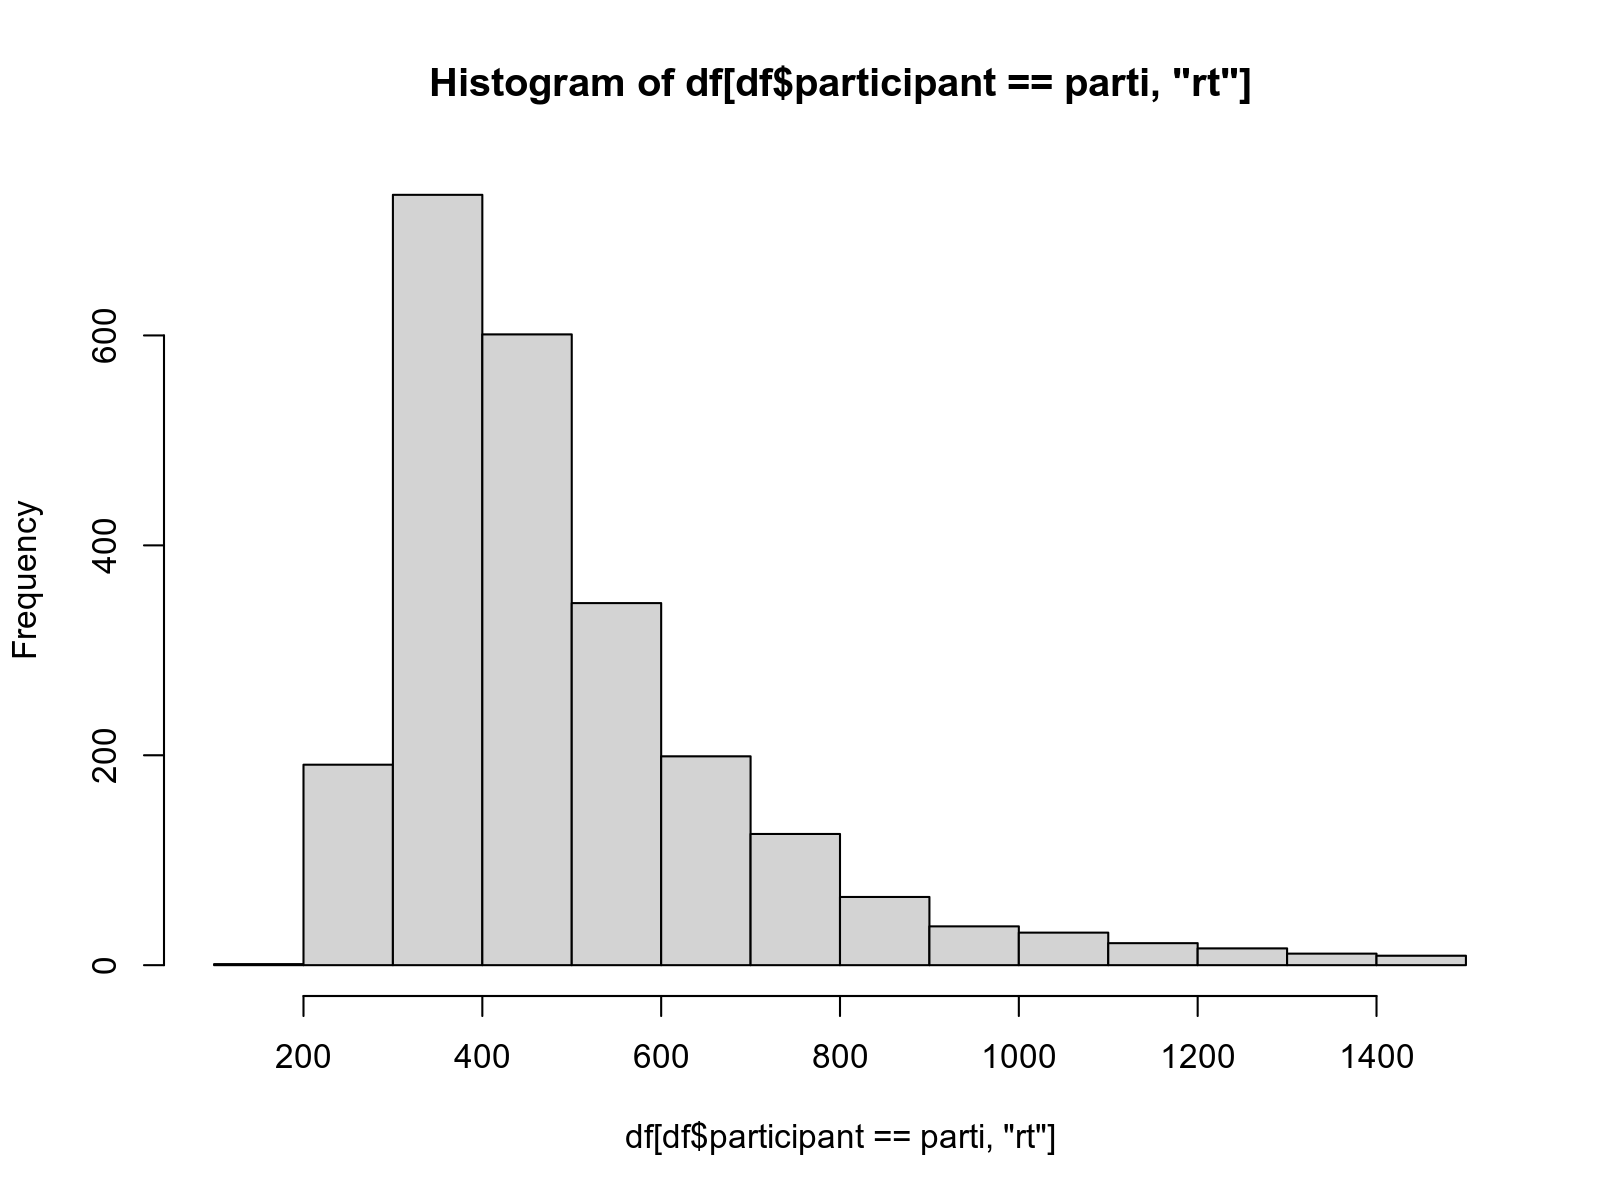

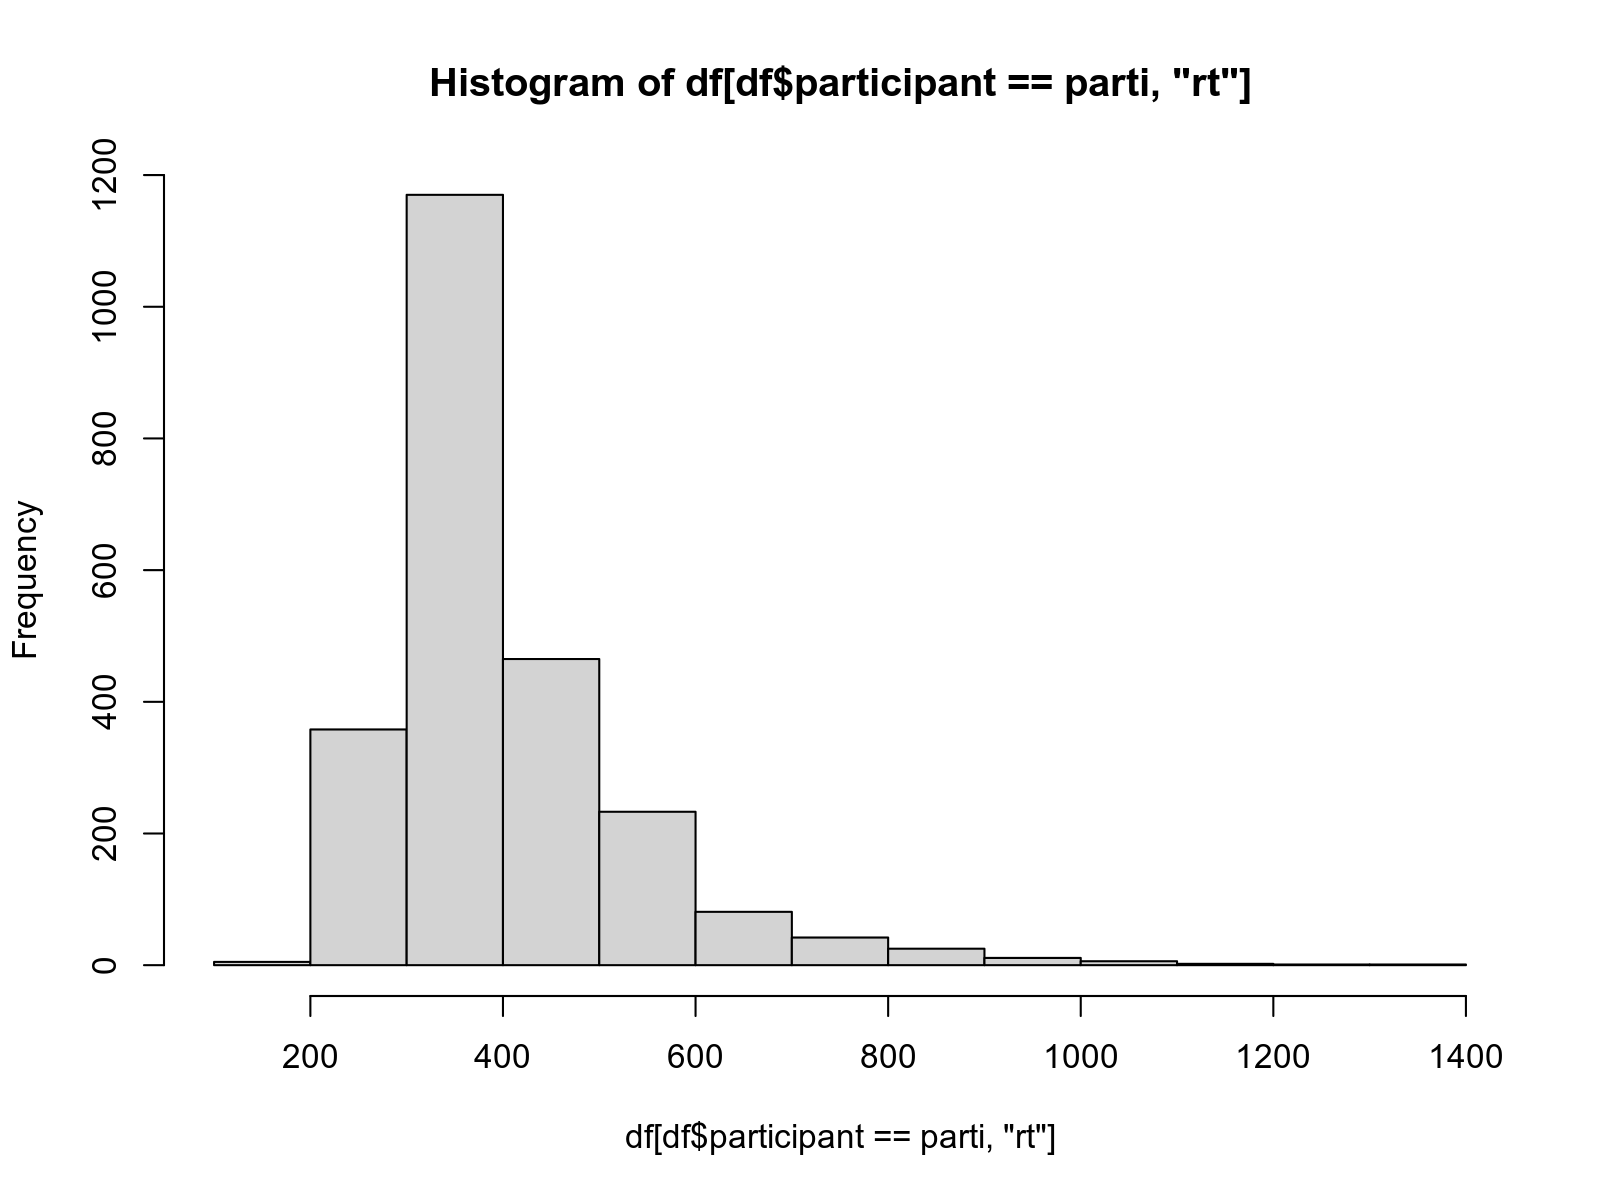

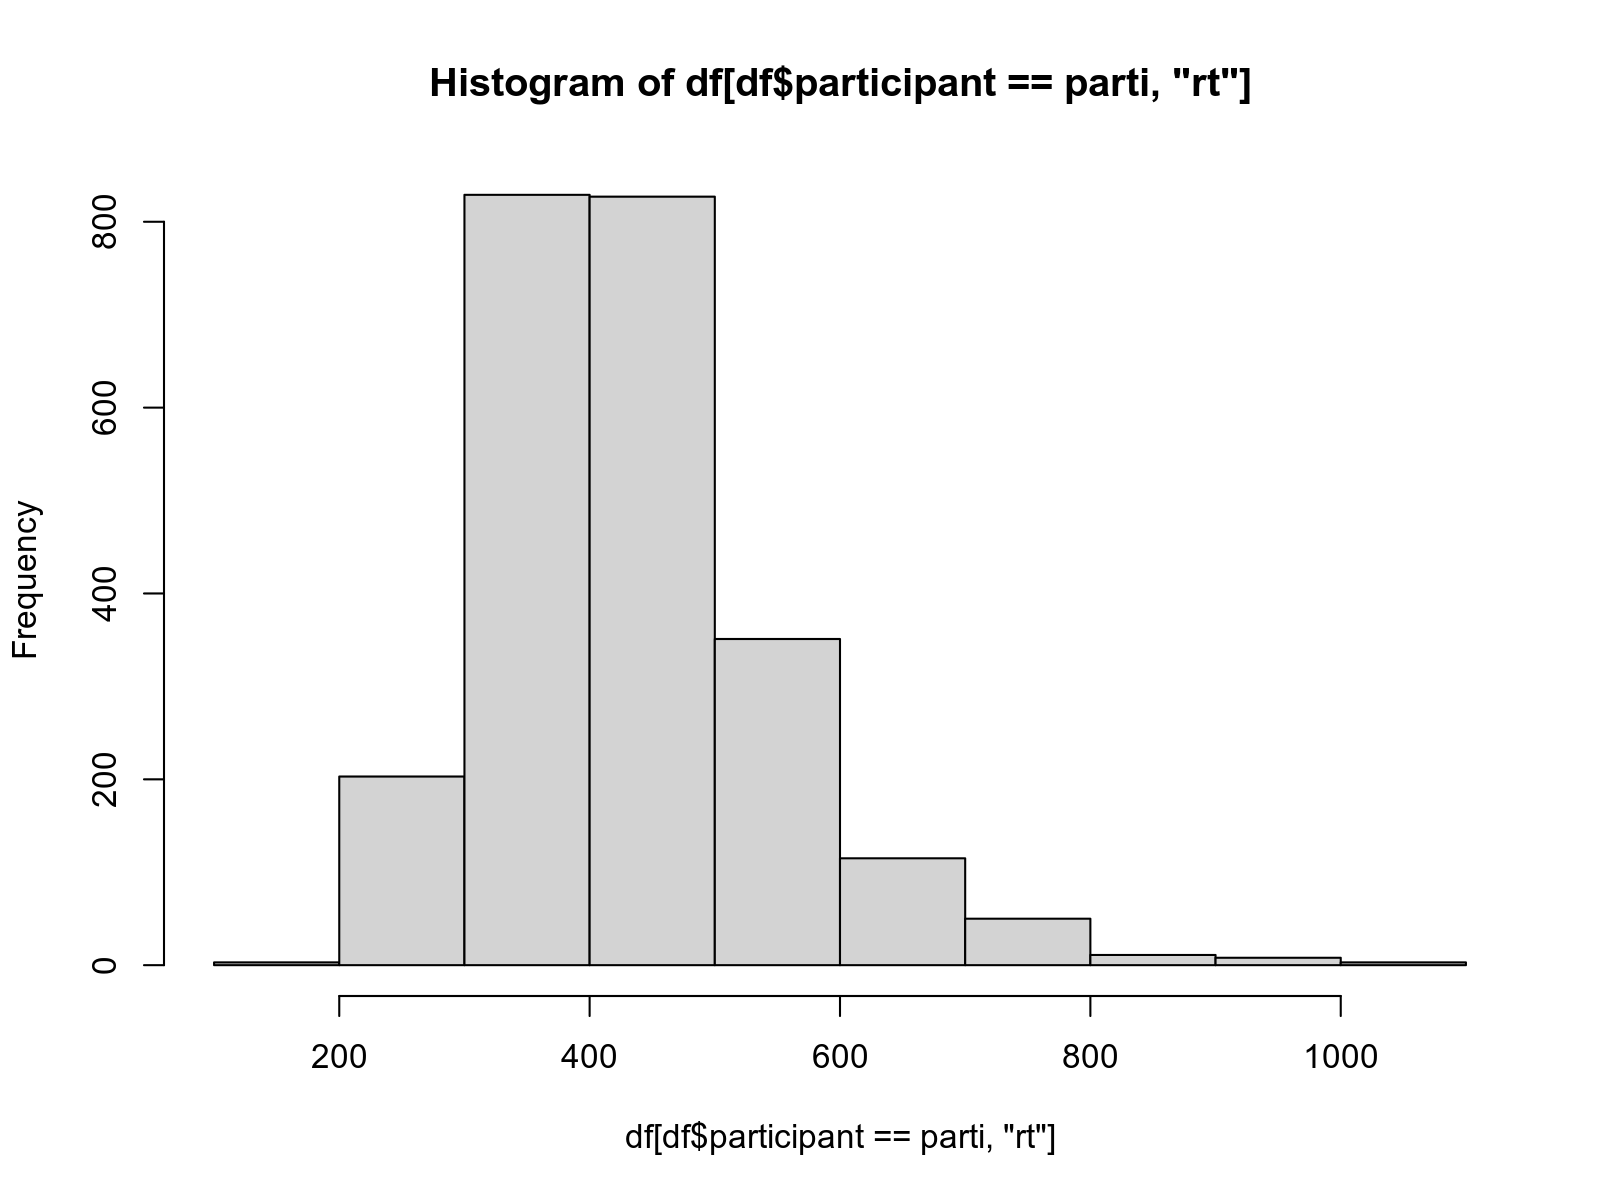

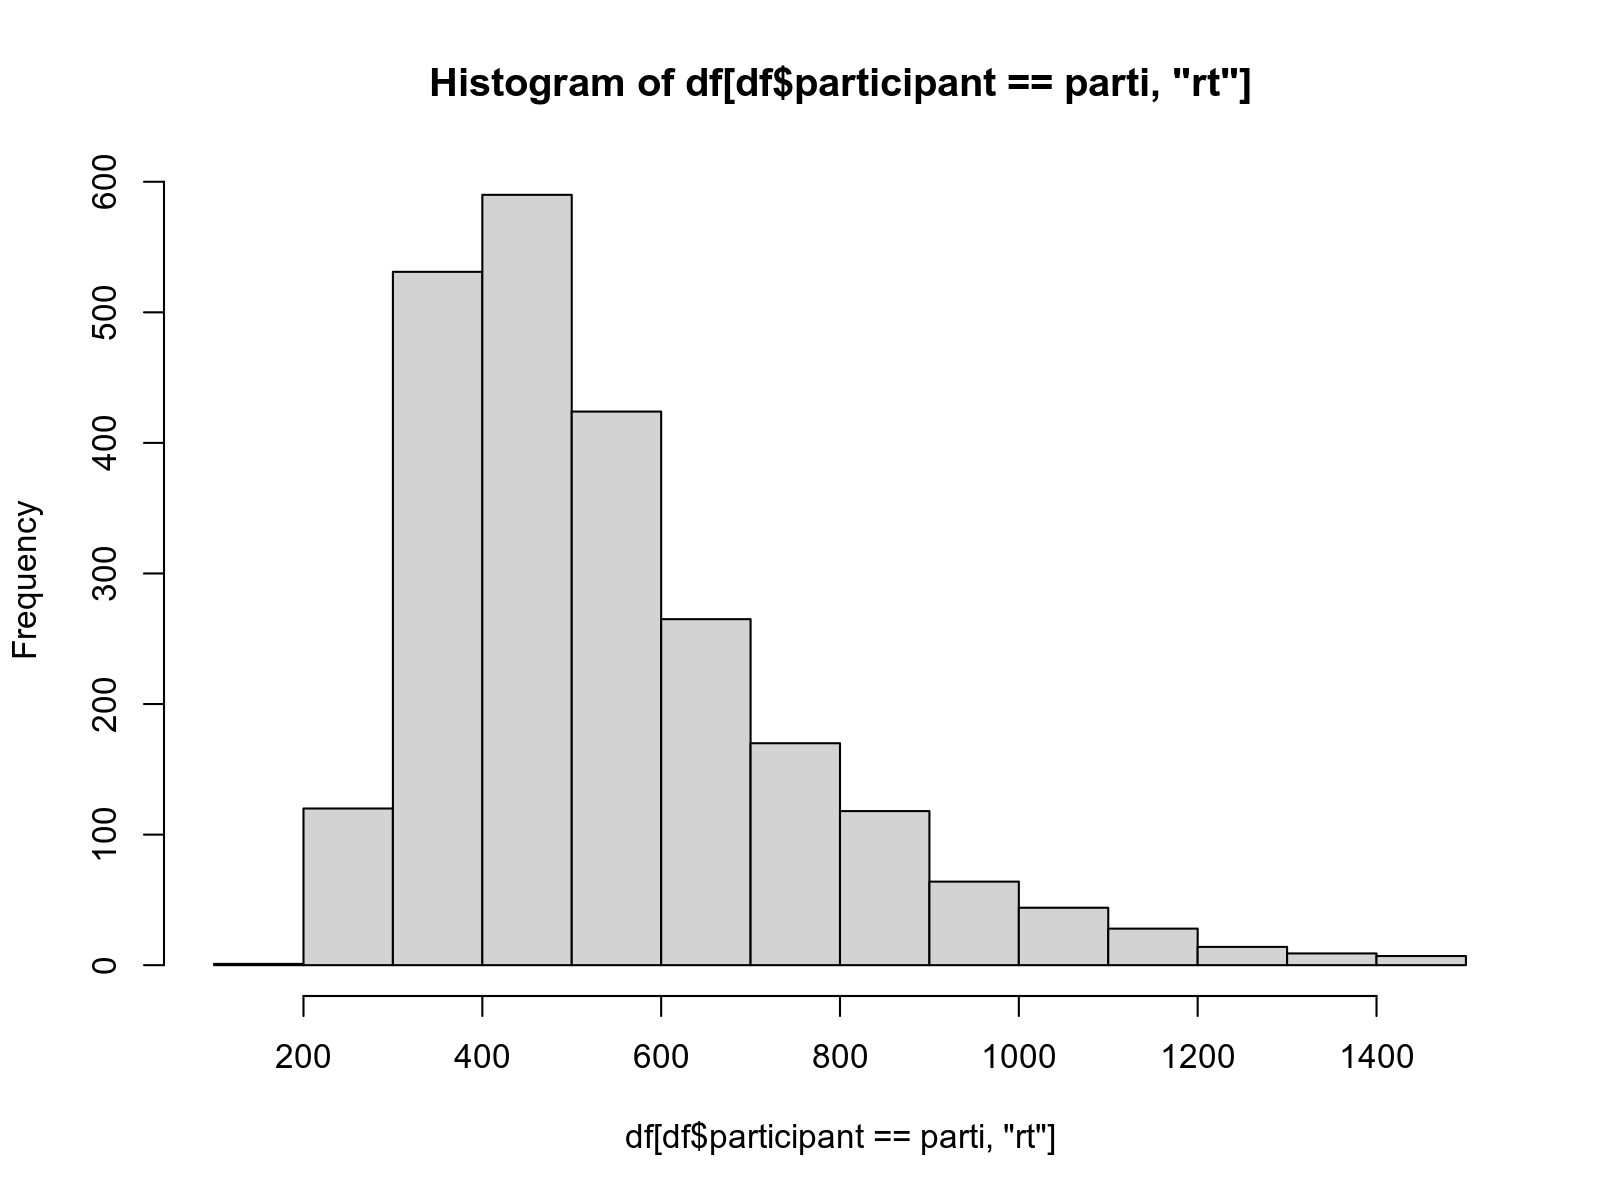

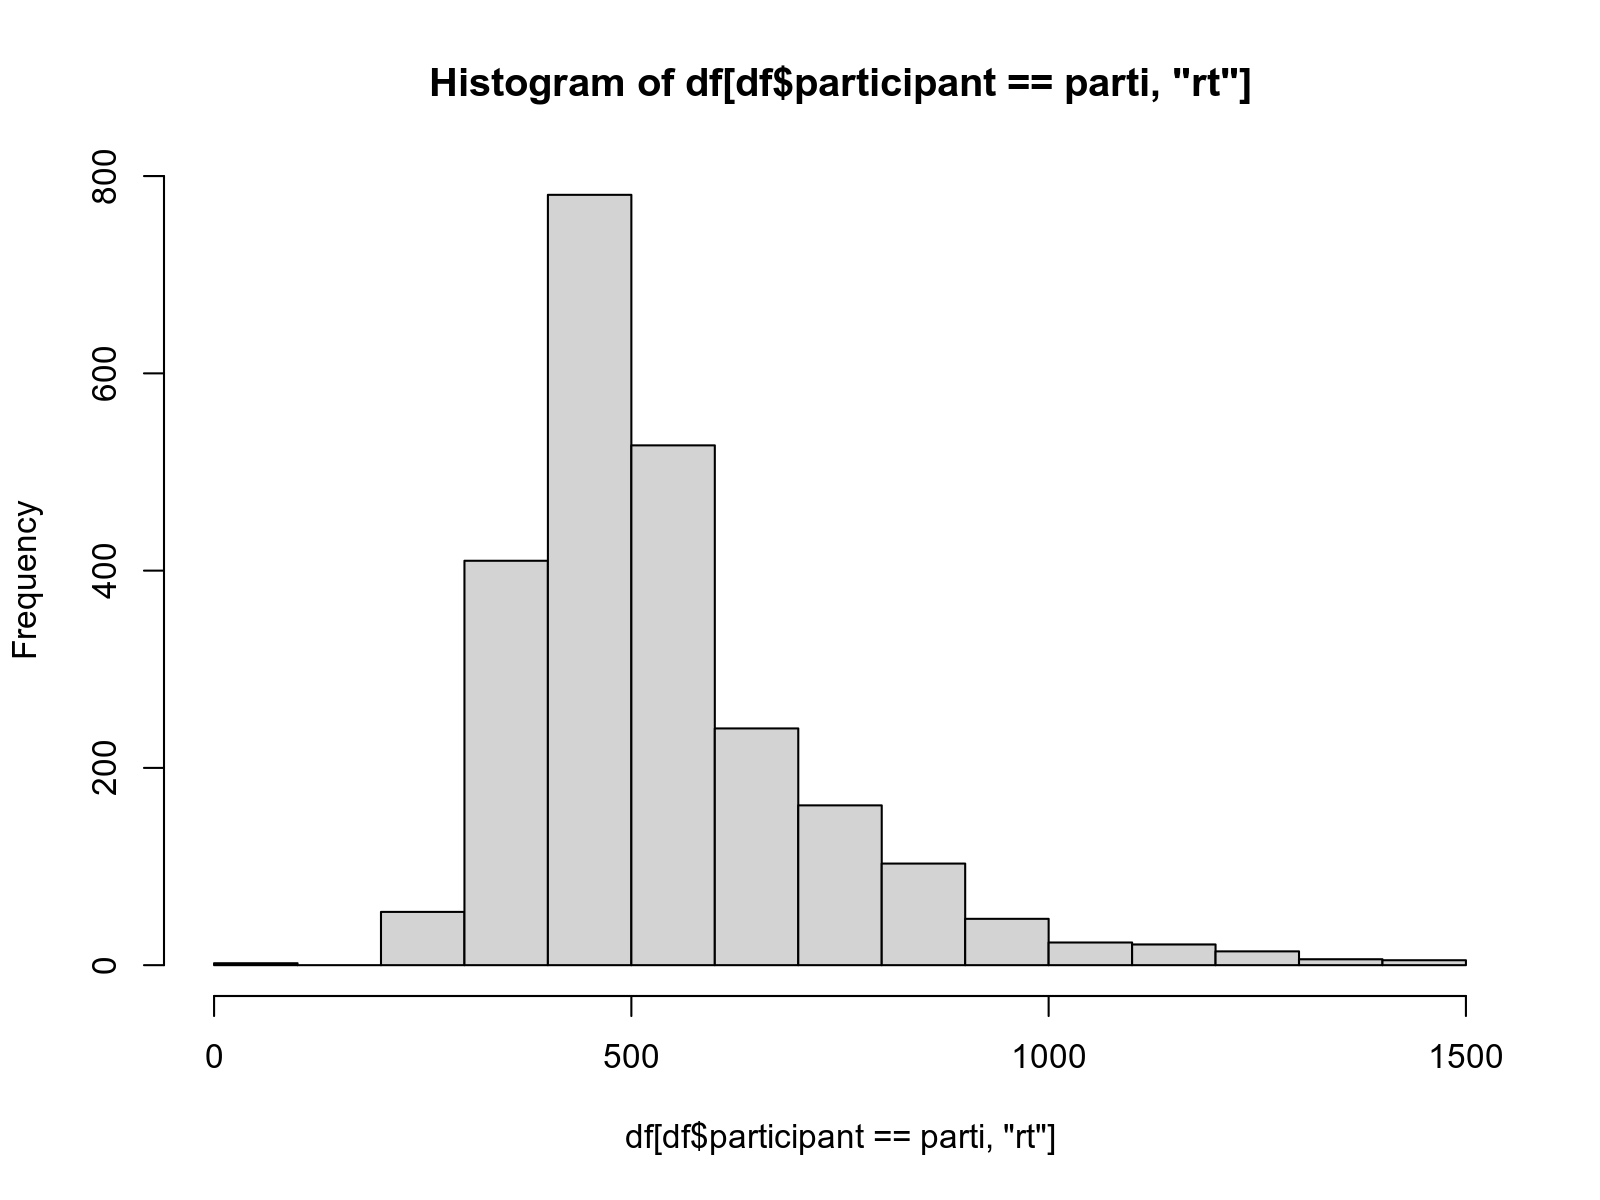

In [34]:
for (parti in unique(df$participant)){#Unefficient
    hist(df[df$participant == parti,'rt'])
}
    

## Data wrangling

In this dataset some RTs were not recorded :

In [35]:
df[is.na(df$rt),]

,participant,contraste,condition,rt
,<chr>,<int>,<chr>,<dbl>
2708,S13,1,Accuracy,NA
2744,S13,3,Accuracy,NA
2752,S13,1,Accuracy,NA
2783,S13,3,Accuracy,NA
2840,S13,4,Accuracy,NA
2868,S13,2,Accuracy,NA
2874,S13,4,Accuracy,NA
2933,S13,1,Accuracy,NA
2986,S13,2,Accuracy,NA


And some are unreaseonably too short :

In [36]:
min(df[!is.na(df$rt),'rt'])#note the use of "!"

[1] 2.441406

We therefore would like to have a subset of the data were RTs were recorded and represent a genuine reaction time

In [37]:
nona_df = df[!is.na(df$rt),]
prepocessed_df = nona_df[nona_df$rt>200,]#>200 ms is arbitrary and inappropriate

OR

In [38]:
prepocessed_df = df[!is.na(df$rt) & df$rt>200,]

Is it the same ?

In [39]:
length(nona_df[nona_df$rt>200,]) == length(df[!is.na(df$rt) & df$rt>200,])

[1] TRUE

In [40]:
summary(prepocessed_df)

 participant          contraste      condition               rt        
 Length:32998       Min.   :1.000   Length:32998       Min.   : 200.2  
 Class :character   1st Qu.:2.000   Class :character   1st Qu.: 357.9  
 Mode  :character   Median :3.000   Mode  :character   Median : 437.5  
                    Mean   :3.005                      Mean   : 486.5  
                    3rd Qu.:4.000                      3rd Qu.: 562.5  
                    Max.   :5.000                      Max.   :1498.5  

We could do the same for any other variable, 

>e.g. try to remove one participant

In [41]:
unique(prepocessed_df[prepocessed_df$participant != "S16",'participant'])

[1] "S13" "S17" "s3"  "S7"  "S15" "S9"  "S5"  "S6"  "S4"  "S14" "S2"  "S10"
[13] "S12"

But we have no reason to remove that participant so we don't store this trim

# Plotting

Let's plot the data ! (in base R)

In [42]:
head(aggregate(rt~participant*condition , data=prepocessed_df , mean))

,participant,condition,rt
,<chr>,<chr>,<dbl>
1,S10,Accuracy,663.6109
2,S12,Accuracy,616.6359
3,S13,Accuracy,503.1480
4,S14,Accuracy,409.5335
5,S15,Accuracy,645.8327
6,S16,Accuracy,525.9041


In [43]:
ind_means = aggregate(rt~participant*condition , data=prepocessed_df , mean)
grand_means = aggregate(rt ~ condition, data=ind_means, mean)

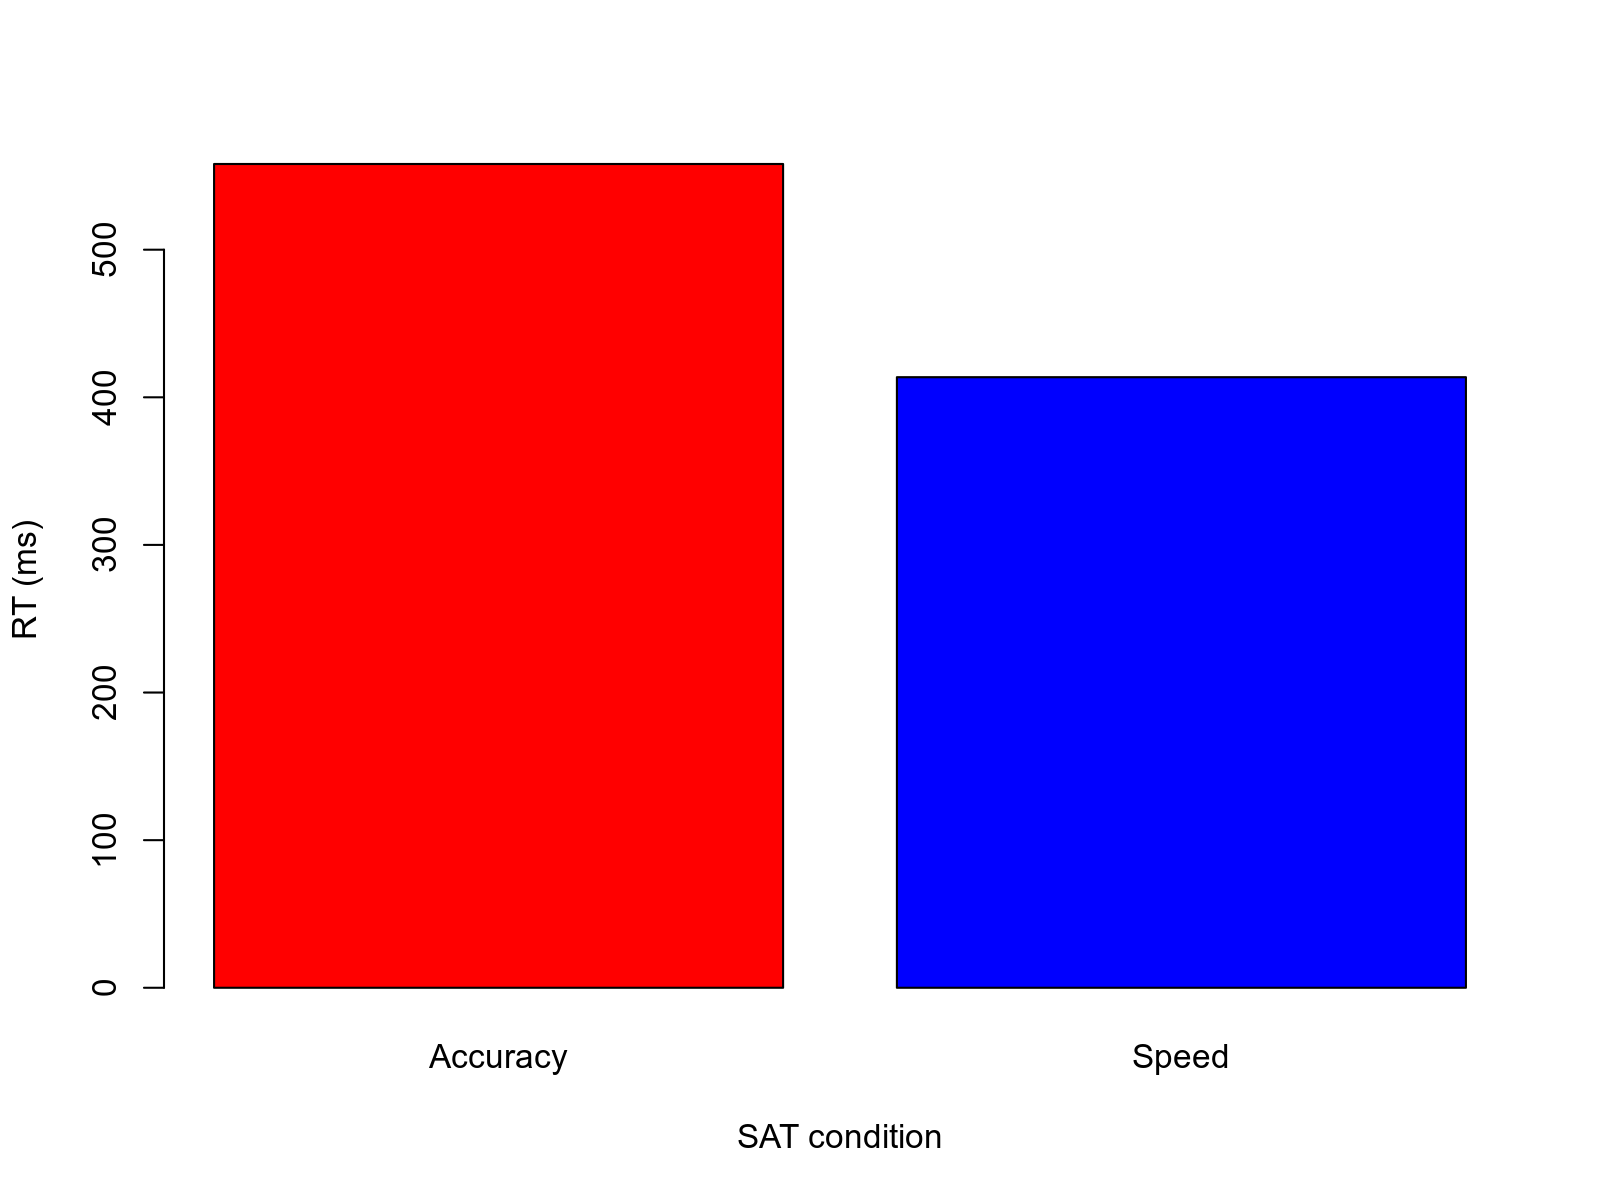

In [44]:
barplot(rt ~ condition, data=grand_means, ylab='RT (ms)',
   xlab="SAT condition",  col=c("red","blue")) 

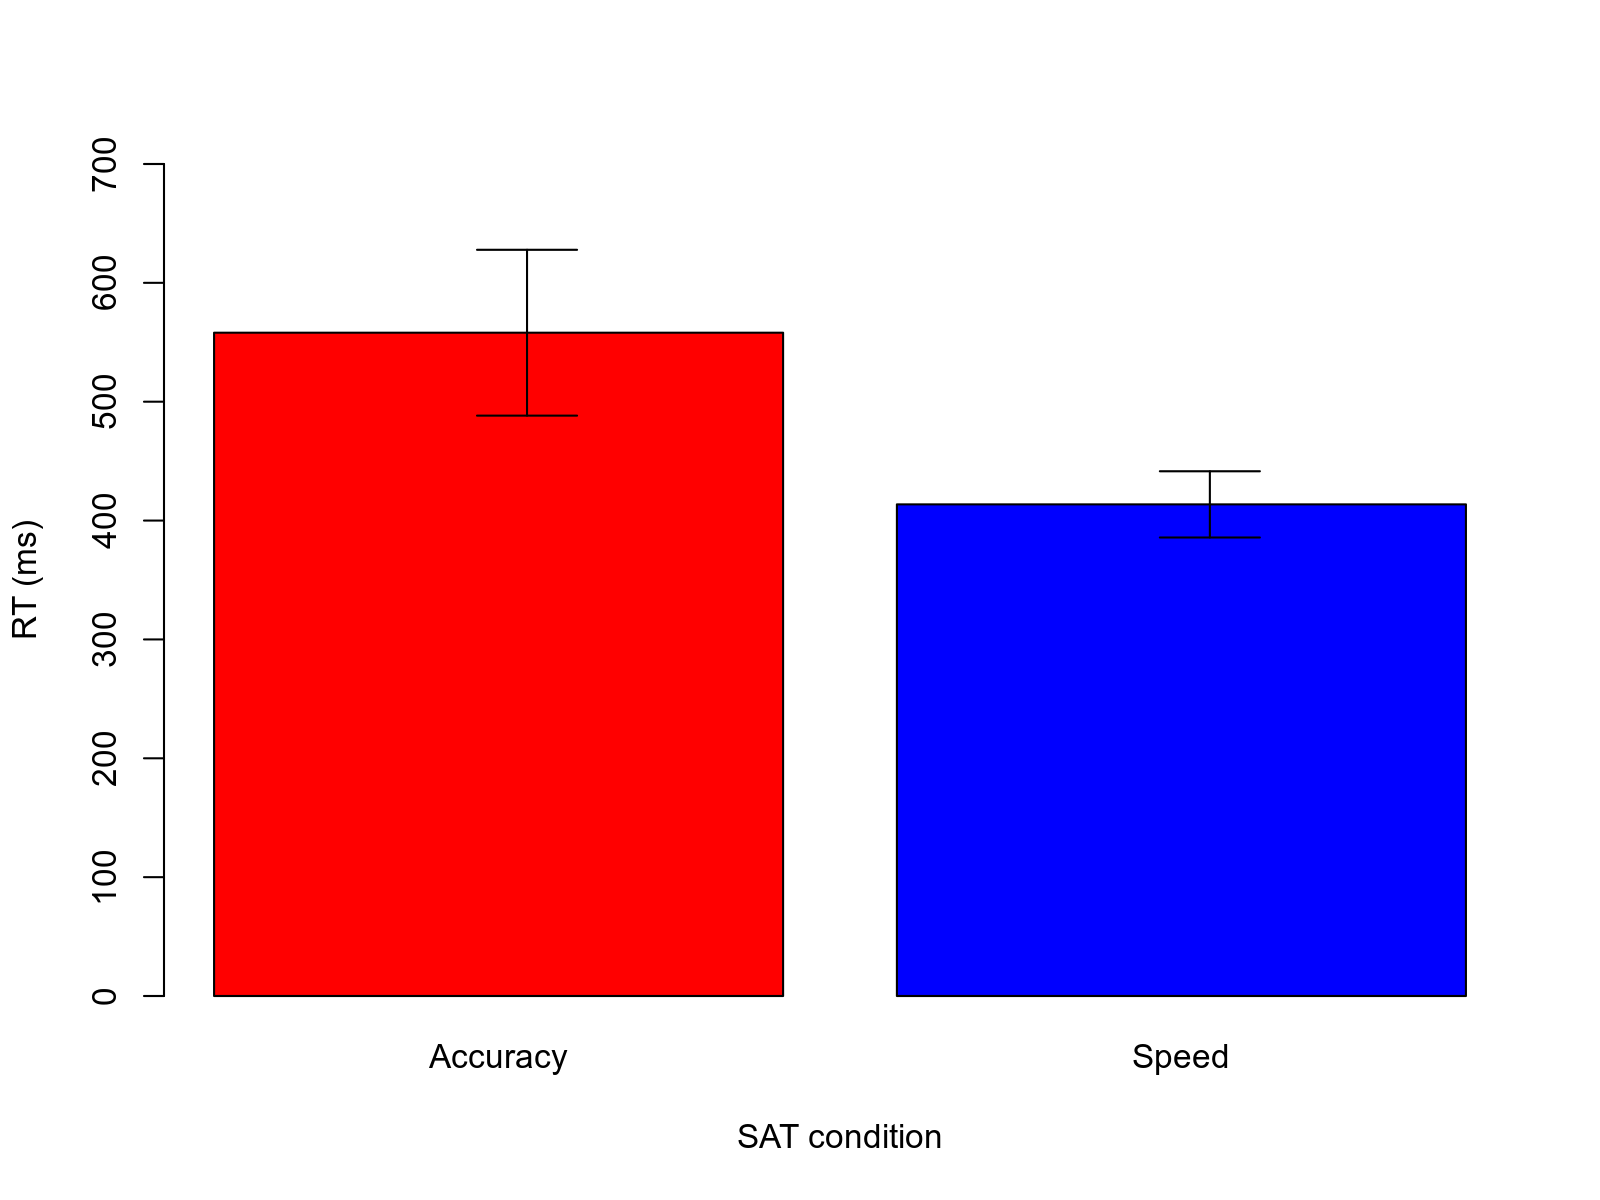

In [45]:
grand_std = aggregate(rt ~ condition, data=ind_means, sd)

barplot(rt ~ condition, data=grand_means, ylab='RT (ms)',
   xlab="SAT condition",  col=c("red","blue"), ylim=c(0,700)) 

arrows(.75,grand_means$rt[1] + grand_std$rt[1], .75, grand_means$rt[1] - grand_std$rt[1], angle=90, code=3)
arrows(1.95,grand_means$rt[2] + grand_std$rt[2], 1.95, grand_means$rt[2] - grand_std$rt[2], angle=90, code=3)

> Perform the same for the contrast manipulation (only for the condition where participants needed to be accurate). Skip the dispersion (e.g. std)

Barplot ?

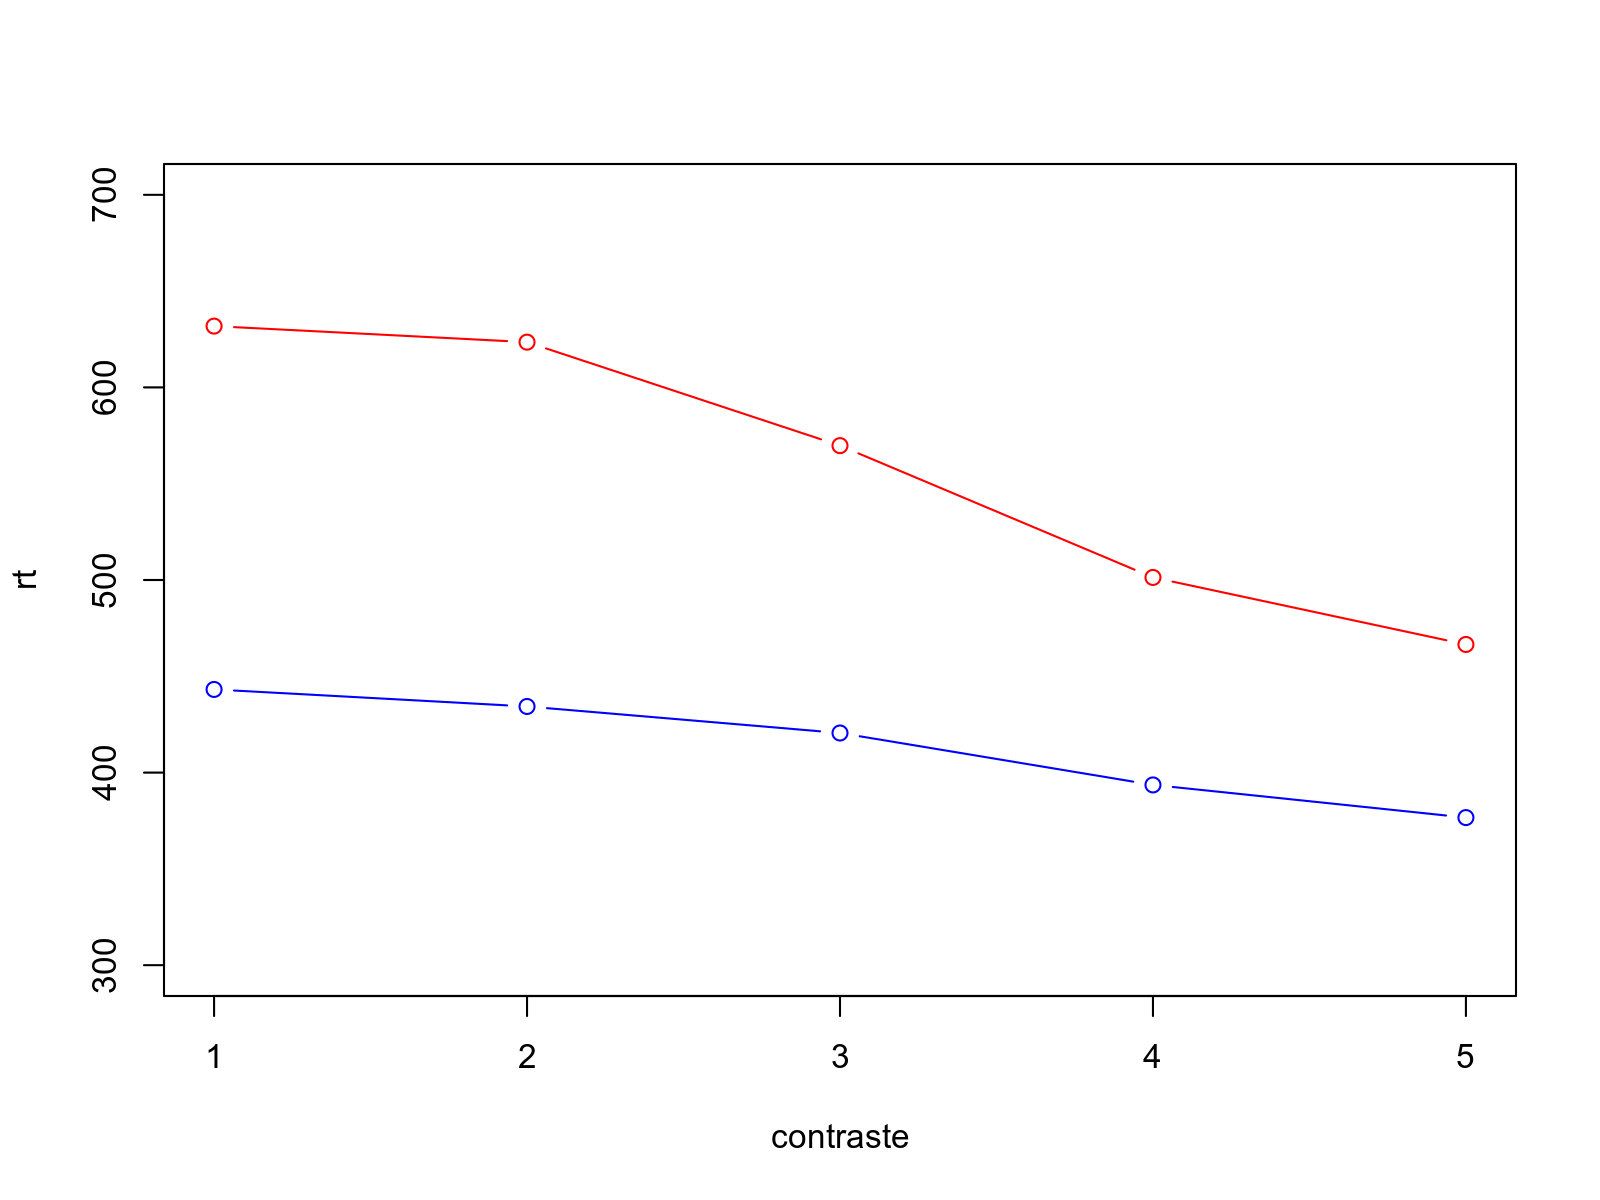

In [46]:
ind_means_acc = aggregate(rt~participant*contraste , data=prepocessed_df[prepocessed_df$condition == "Accuracy",] , mean)
grand_mean_acc = aggregate(rt ~ contraste, data=ind_means_acc, mean)

ind_means_spd = aggregate(rt~participant*contraste , data=prepocessed_df[prepocessed_df$condition == "Speed",] , mean)
grand_mean_spd = aggregate(rt ~ contraste, data=ind_means_spd, mean)

plot(grand_mean_acc, type="b", ylim=c(300,700), col='red')
lines(grand_mean_spd, type="b", col='blue')



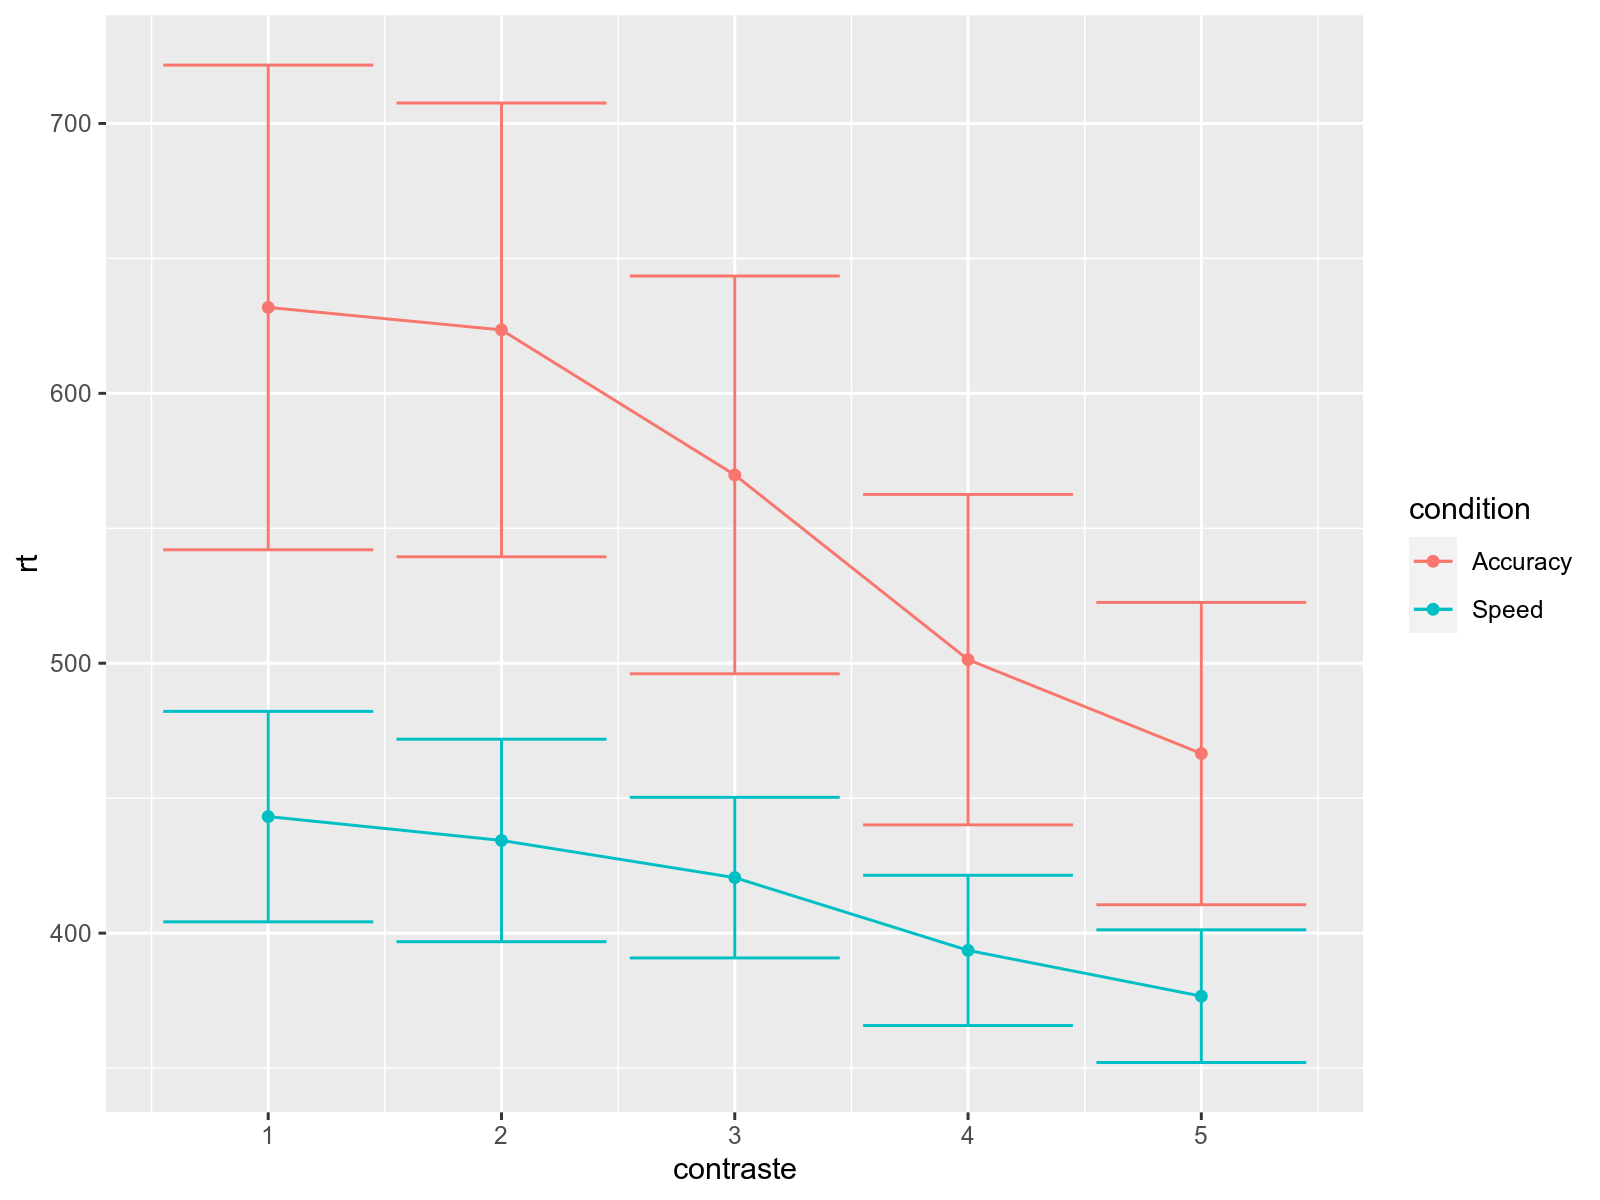

In [47]:
library(ggplot2)
ind_means = aggregate(rt~participant*contraste*condition , data=prepocessed_df, mean)
means = aggregate(rt~contraste*condition , data=ind_means, mean)
means$std = aggregate(rt~contraste*condition , data=ind_means, sd)$rt

ggplot(data=means, aes(x=contraste, y=rt, group=condition)) +
  geom_line(aes(col=condition))+
  geom_point(aes(col=condition))+
  geom_errorbar( aes(x=contraste, ymin=rt-std, ymax=rt+std,col=condition))

# Last recommendations

- Use the documentation
- Learn how to duckduckgo (or google)

~~How do I group my participant ?~~ | How do I subset my dataframe based on a column ?
- Always test your manipulations 
- Use extension (e.g. dplyr, ggplot2,...) once you're familiar enough with base R



A sample of useful ressources : 
- Danielle Navarro's amazing book : https://learningstatisticswithr.com/ (see also her github profile)
- R for data science : https://r4ds.had.co.nz/index.html
- (French) Initiation à la statistique avec R, Frédéric Bertrand et Myriam Maumy-Bertrand (2010!)
